# Check possibility to remove the subset path 

In [1]:
from omsapi import OMSAPI
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
omsapi = OMSAPI(api_url="https://vocms0185.cern.ch/agg/api", api_version="v1", cert_verify=False)
omsapi.auth_oidc("oms-api-client", "4577f6da-bbf7-4f5e-a898-f8db325e7e5e", audience="cmsoms-int-0185")

In [3]:
dataset_name='SingleMuon'
q_dataset=omsapi.query("datasetrates").paginate(page=1,per_page=1000).filter("run_number",315721).filter("dataset_name",dataset_name)
response_dataset=q_dataset.data()
folded_json_dataset=response_dataset.json()
df_singlemuon=pd.json_normalize(folded_json_dataset['data'])
df_singlemuon.set_index('attributes.first_lumisection_number',inplace=True)
df_singlemuon=df_singlemuon[23:628]

https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][EQ]=315721&filter[dataset_name][EQ]=SingleMuon&page[offset]=0&page[limit]=1000


In [4]:
df_singlemuon_dict={}
path_name_list=['HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10', 
                'HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10', 
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_v13',
                'HLT_IsoMu24_eta2p1_v13',
                'HLT_IsoMu24_v11',
                'HLT_IsoMu27_v14',
                'HLT_IsoMu30_v2',
                'HLT_L1SingleMu18_v3',
                'HLT_L1SingleMu25_v2',
                'HLT_L2Mu10_v7',
                'HLT_L2Mu50_v2',
                'HLT_Mu10_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT350_PFMETNoMu60_v12',
                'HLT_Mu12_v1',
                'HLT_Mu15_IsoVVVL_PFHT450_CaloBTagCSV_4p5_v7',
                'HLT_Mu15_IsoVVVL_PFHT450_PFMET50_v13',
                'HLT_Mu15_IsoVVVL_PFHT450_v13',
                'HLT_Mu15_IsoVVVL_PFHT600_v17',
                'HLT_Mu15_v1',
                'HLT_Mu20_v11',
                'HLT_Mu27_v12',
                'HLT_Mu3_PFJet40_v14',
                'HLT_Mu50_IsoVVVL_PFHT450_v13',
                'HLT_Mu50_v12',
                'HLT_Mu55_v2',
                'HLT_Mu8_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT300_PFMETNoMu60_v13',
                'HLT_OldMu100_v3',
                'HLT_TkMu100_v2']
for i in path_name_list : 
    q = omsapi.query("hltpathrates").paginate(page=1, per_page=1000).filter("run_number",315721).filter("path_name",i)
    response=q.data()
    folded_json=response.json()
    df=pd.json_normalize(folded_json['data'])
    df.set_index('attributes.first_lumisection_number',inplace=True)
    df=df[23:628]
    df_singlemuon_dict[i]=df

https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1&page[offset]=0&page[limit]=1000


## List of paths

In [5]:
number = 0
for i in list(df_singlemuon_dict.keys()):
    print(number, i)
    number+=1

0 HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10
1 HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10
2 HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10
3 HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10
4 HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1
5 HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10
6 HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10
7 HLT_IsoMu20_v13
8 HLT_IsoMu24_eta2p1_v13
9 HLT_IsoMu24_v11
10 HLT_IsoMu27_v14
11 HLT_IsoMu30_v2
12 HLT_L1SingleMu18_v3
13 HLT_L1SingleMu25_v2
14 HLT_L2Mu10_v7
15 HLT_L2Mu50_v2
16 HLT_Mu10_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT350_PFMETNoMu60_v12
17 HLT_Mu12_v1
18 HLT_Mu15_IsoVVVL_PFHT450_CaloBTagCSV_4p5_v7
19 HLT_Mu15_IsoVVVL_PFHT450_PFMET50_v13
20 HLT_Mu15_IsoVVVL_PFHT450_v13
21 HLT_Mu15_IsoVVVL_PFHT600_v17
22 HLT_Mu15_v1
23 HLT_Mu20_v11
24 HLT_Mu27_v12
25 HLT_Mu3_PFJet40_v14
26 HLT_Mu50_IsoVVVL_PFHT450_v13
27 HLT_Mu50_v12

### Comparison of the paths pattern

In [6]:
def plot(number_list,path_name='',dataset=True,check_acf=True):
    f, axs = plt.subplots(2,2,figsize=(30,30))
    plt.subplot(221)
    hep.cms.label(loc=0)
    if dataset==True:
        plt.plot(df_singlemuon['attributes.rate'],label='SingleMuon',color='black',ls='--')
    key_list=list(df_singlemuon_dict.keys())
    for j in number_list:
        plt.plot(df_singlemuon_dict[key_list[j]]["attributes.rate"],label=df_singlemuon_dict[key_list[j]]['attributes.path_name'][100])
    plt.yscale('log')
    plt.title("Observation")
    plt.legend(loc=1,title=('Run 315721\nDataset : SingleMuon\nPath : '+path_name))
    plt.xlabel('Lumisection')
    plt.ylabel('Rate')
    plt.xlim(-10,700)
    plt.ylim(0.01,1000)
    plt.tight_layout()

    plt.subplot(222)
    if dataset==True:
        plt.plot(df_singlemuon["attributes.rate"].rolling(window=50).mean(),label='SingleMuon',color='black')
    key_list=list(df_singlemuon_dict.keys())
    for j in number_list:
        plt.plot(df_singlemuon_dict[key_list[j]]["attributes.rate"].rolling(window=50).mean(),label=df_singlemuon_dict[key_list[j]]['attributes.path_name'][100])
    plt.yscale('log')
    plt.title("Mean Trend")
    plt.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
    plt.xlabel('Lumisection')
    plt.ylabel('Rate')
    plt.xlim(-10,700)
    plt.ylim(0.01,1000)
    plt.tight_layout()

    if check_acf == True : 
        plt.subplot(212)
        if dataset==True:
            plt.plot(acf(df_singlemuon['attributes.rate'],nlags=600,fft=False),label=df_singlemuon['attributes.dataset_name'][33],color='black',ls='--')
        key_list=list(df_singlemuon_dict.keys())
        for j in number_list:
            plt.plot(acf(df_singlemuon_dict[key_list[j]]["attributes.rate"],nlags=600,fft=False),label=df_singlemuon_dict[key_list[j]]['attributes.path_name'][100])
        plt.legend(title=('Run 315721 \nDataset : SingleMuon'),loc=1,frameon=True)
        plt.title('Autocorrelation')
        plt.xlabel('lags, s')
        plt.ylabel('acf')
        plt.axhline(color='black')
        plt.tight_layout()
    pass

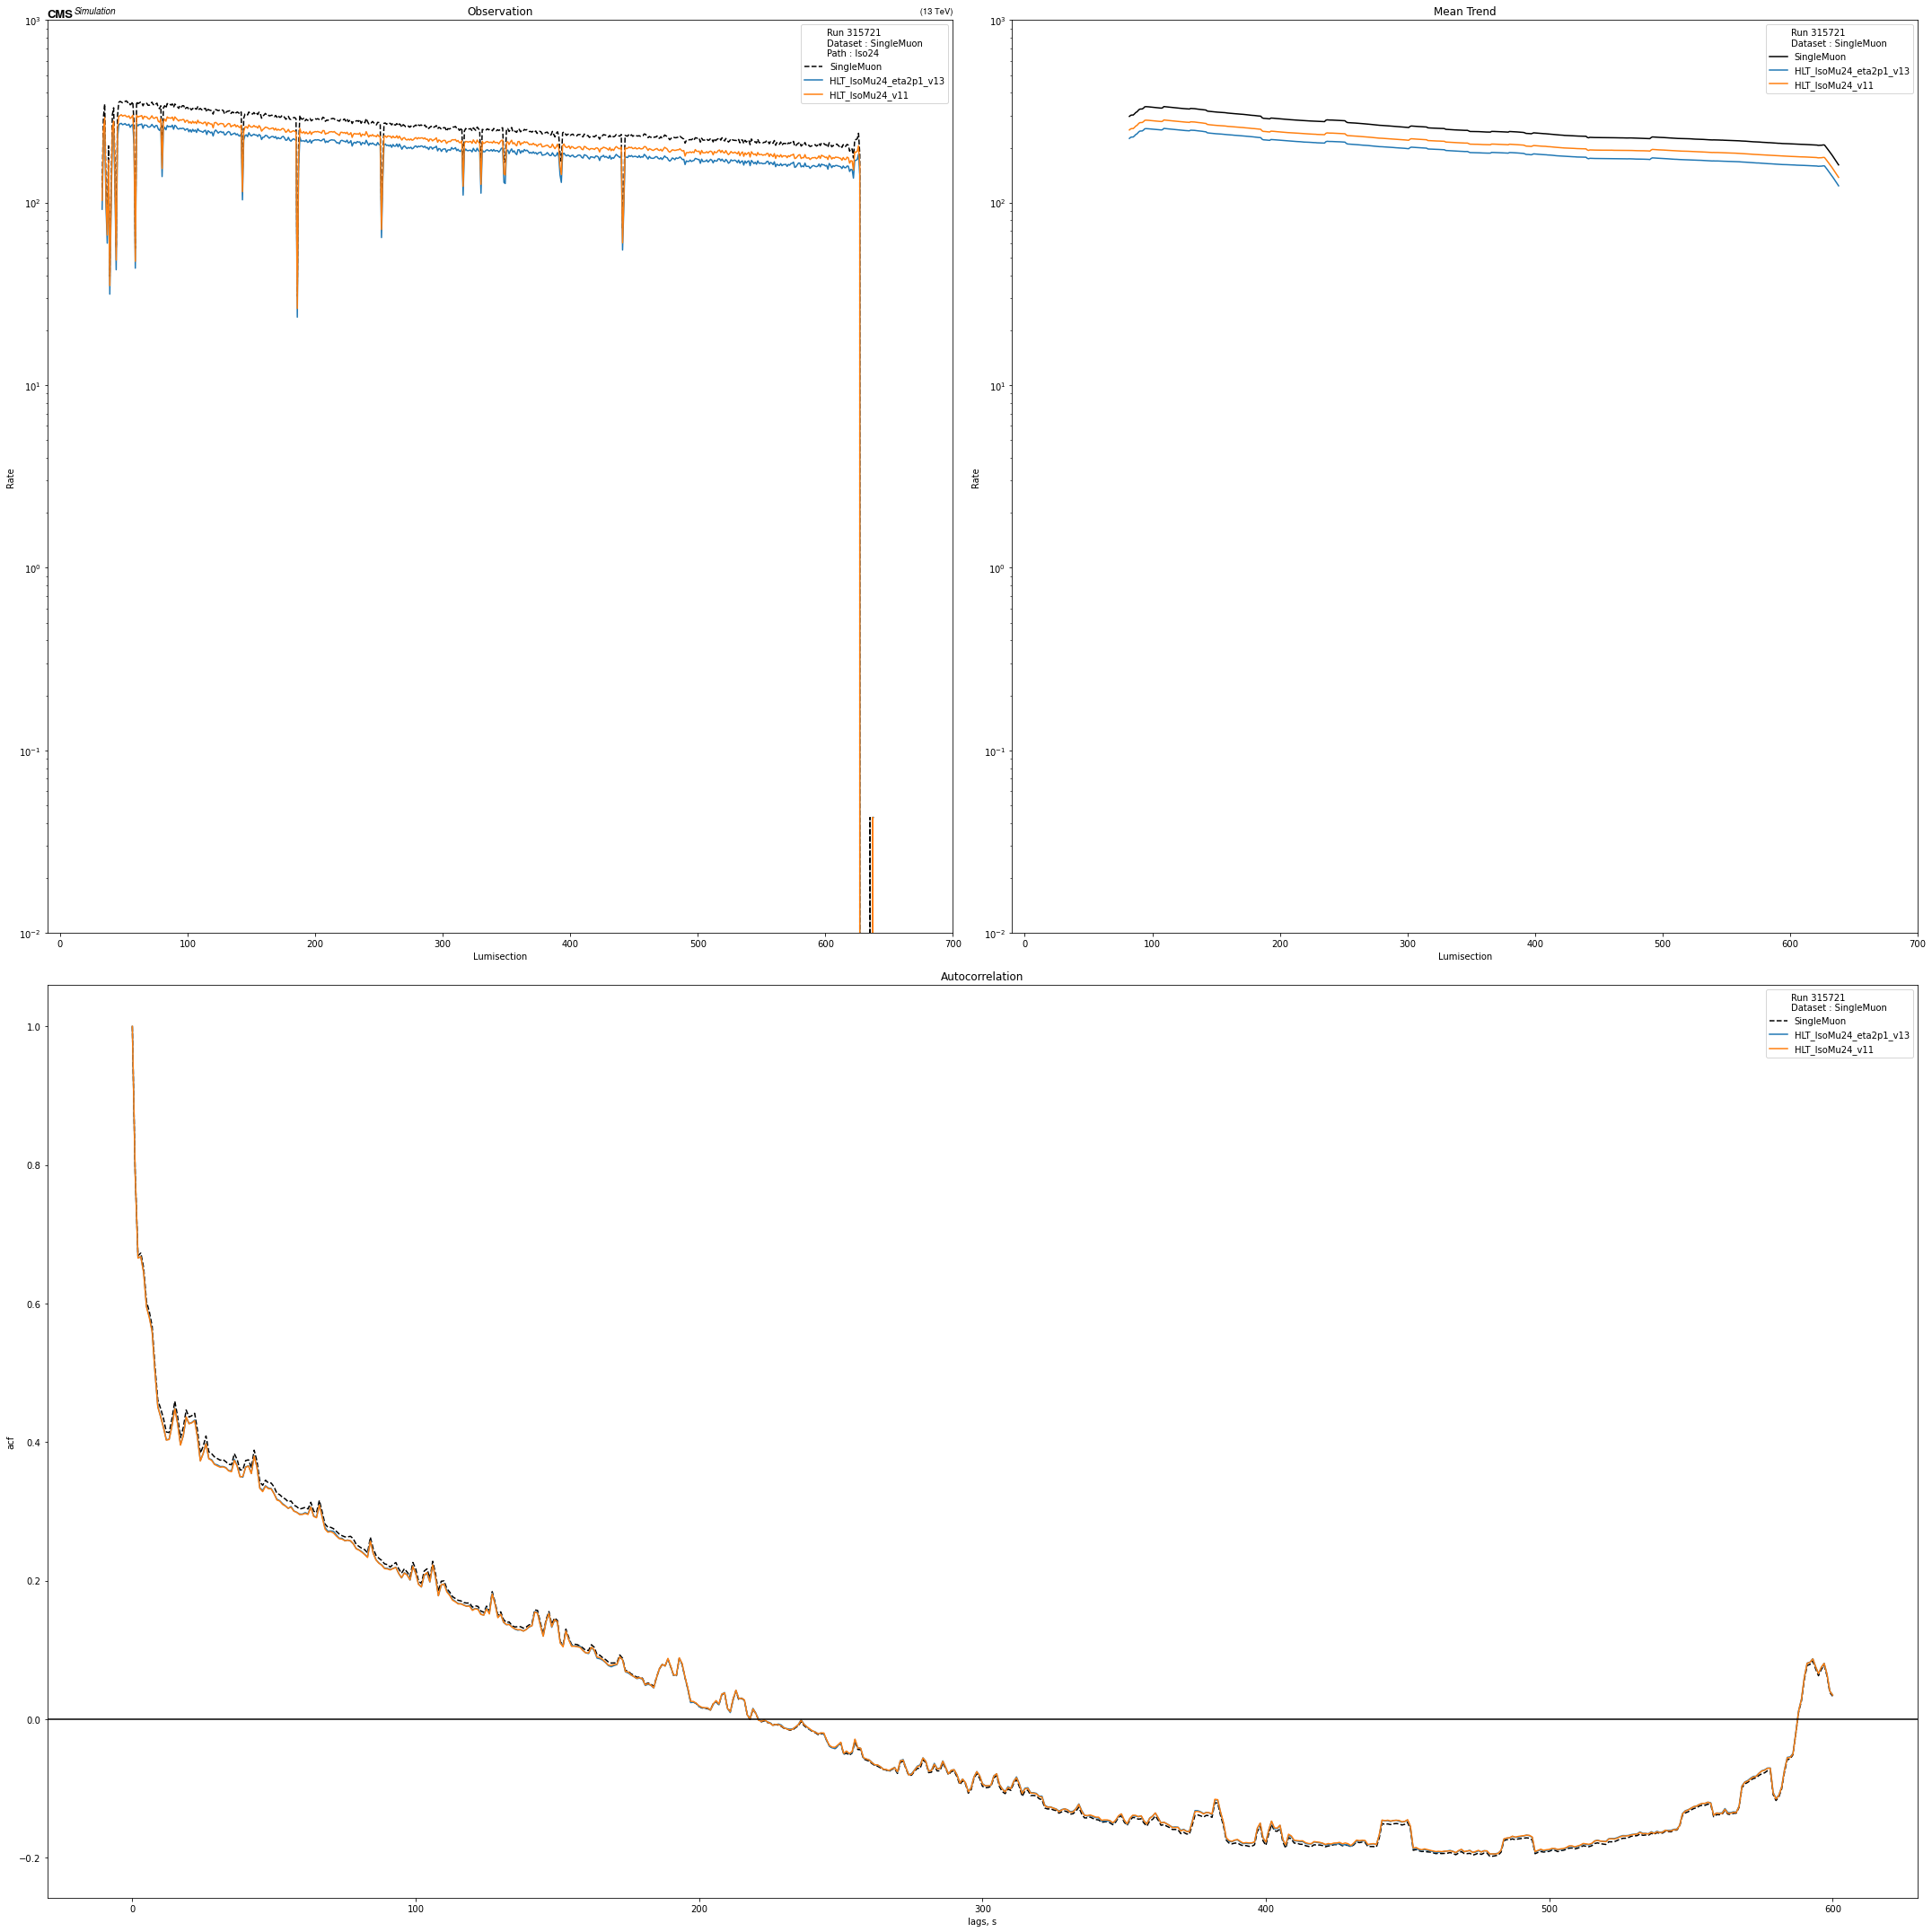

In [7]:
plot(range(8,10),path_name='Iso24')

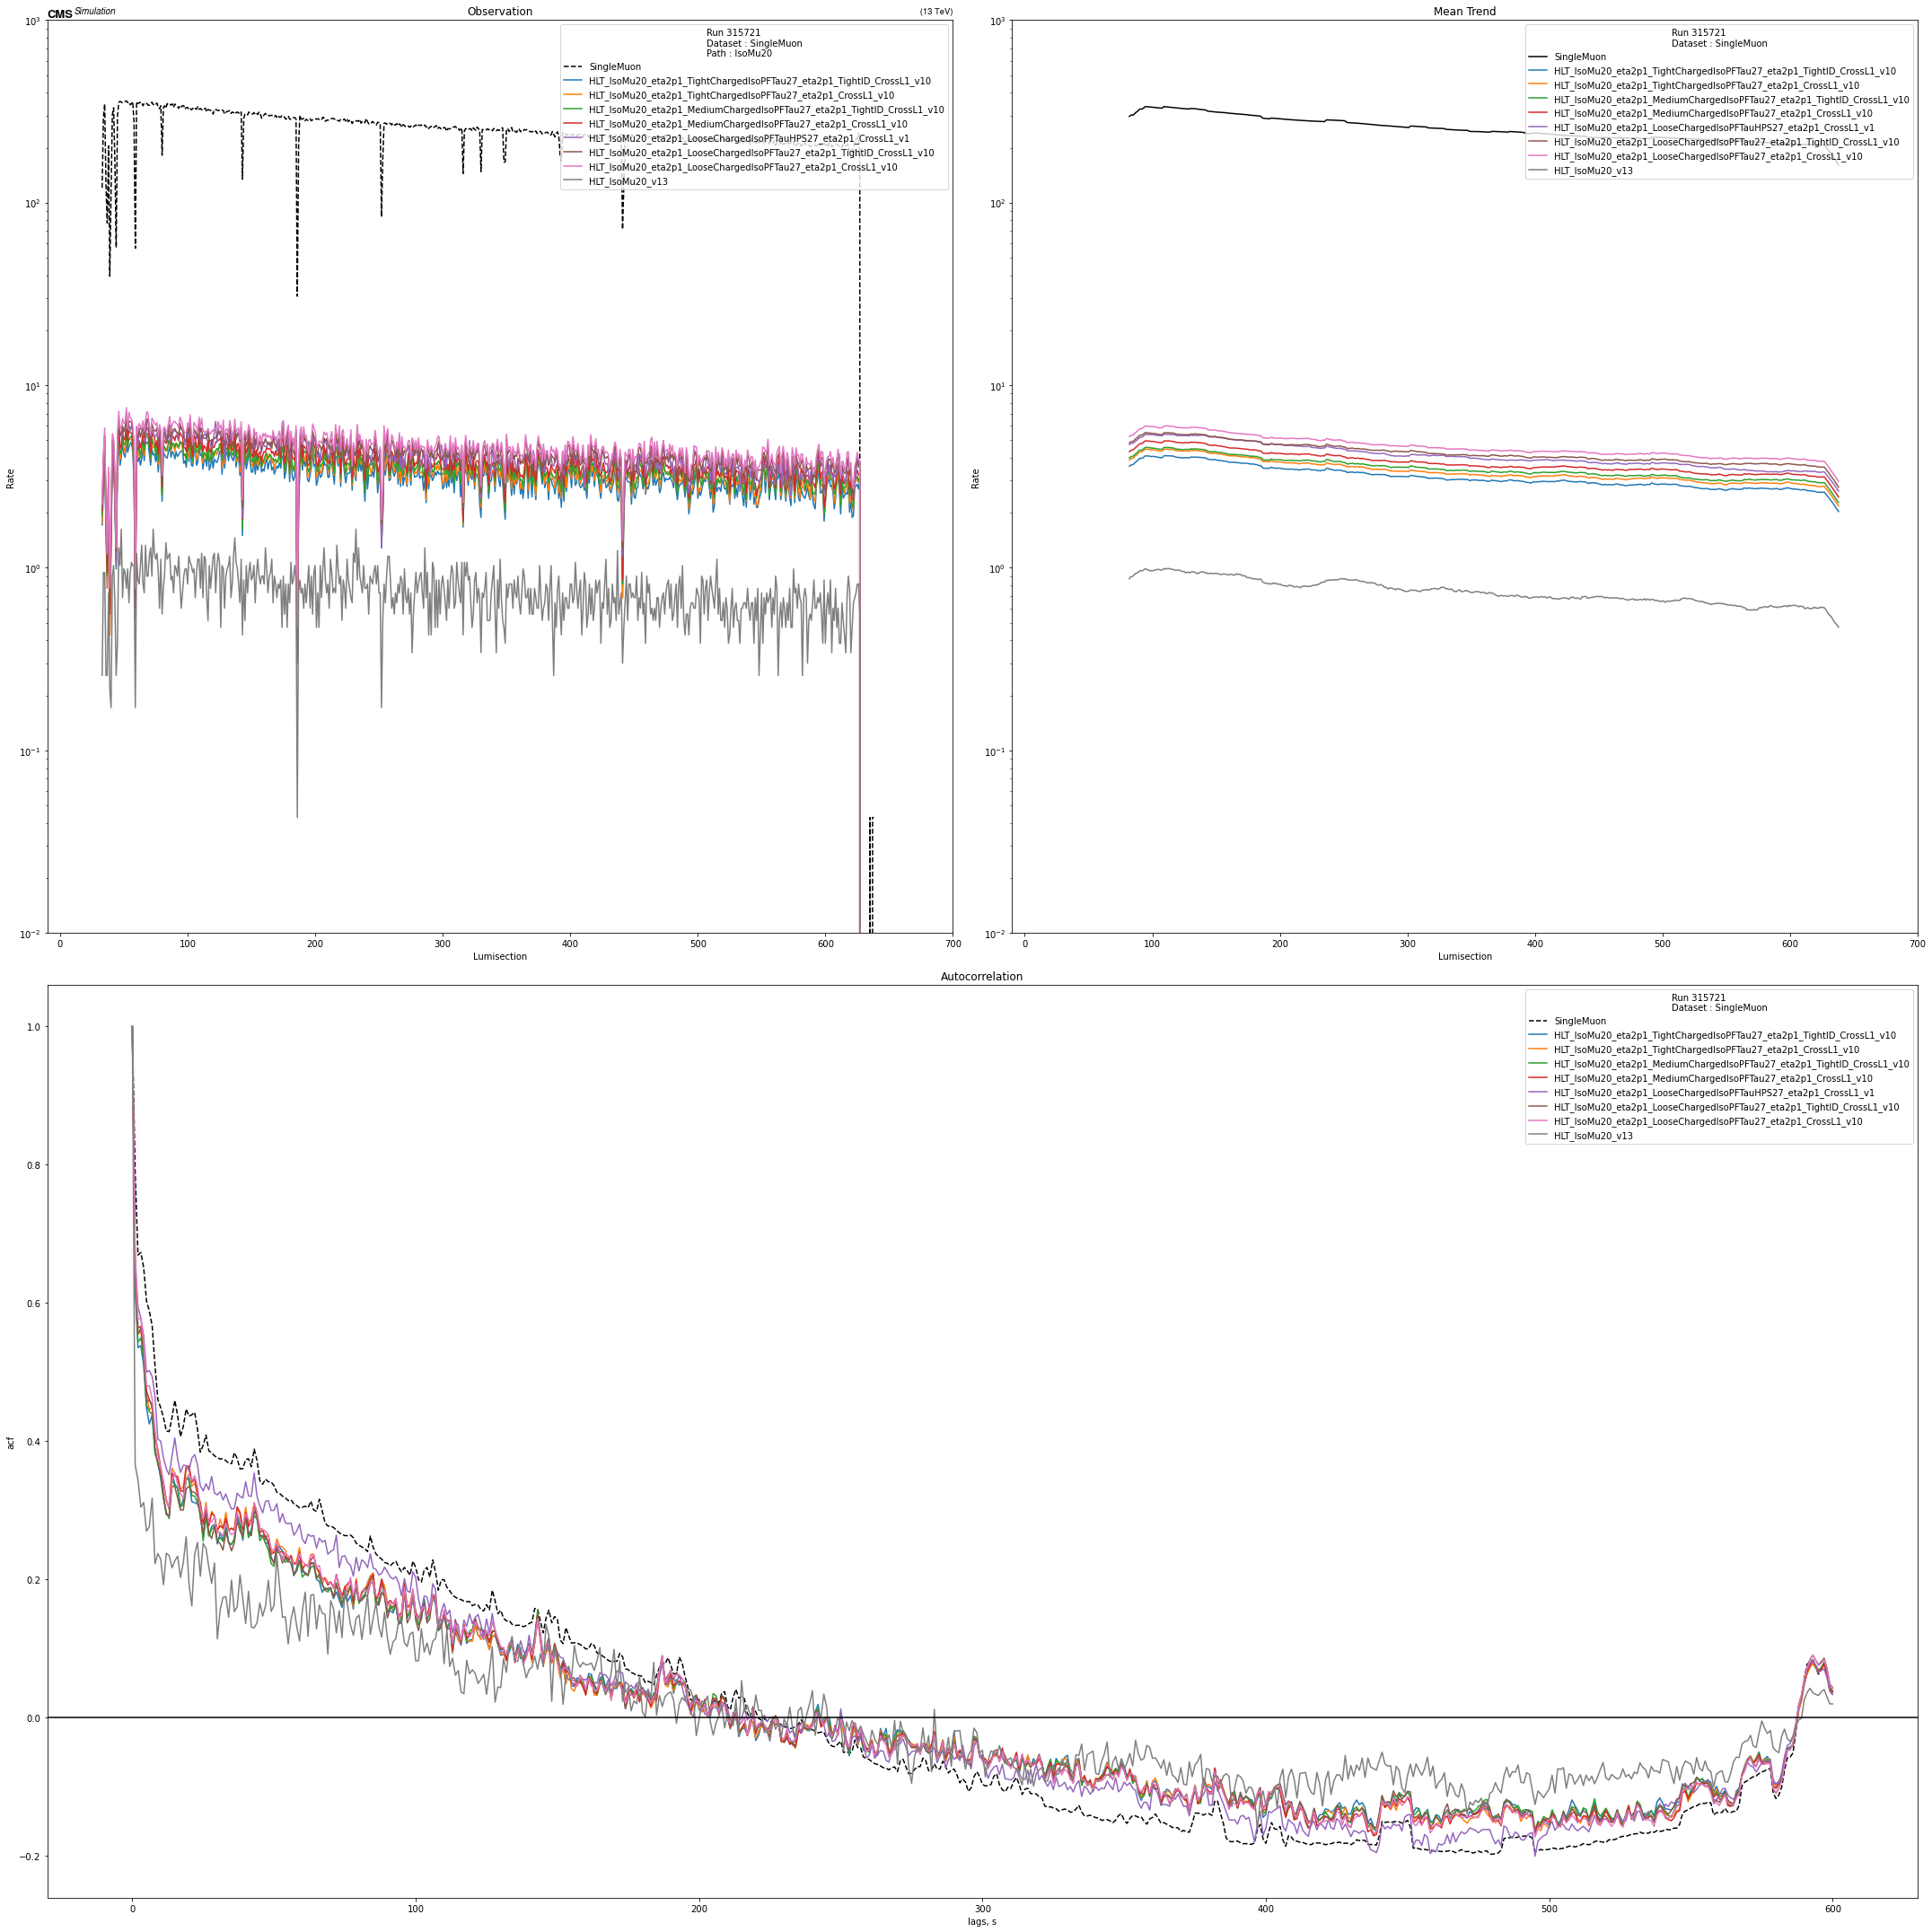

In [8]:
plot(range(0,8),path_name='IsoMu20')

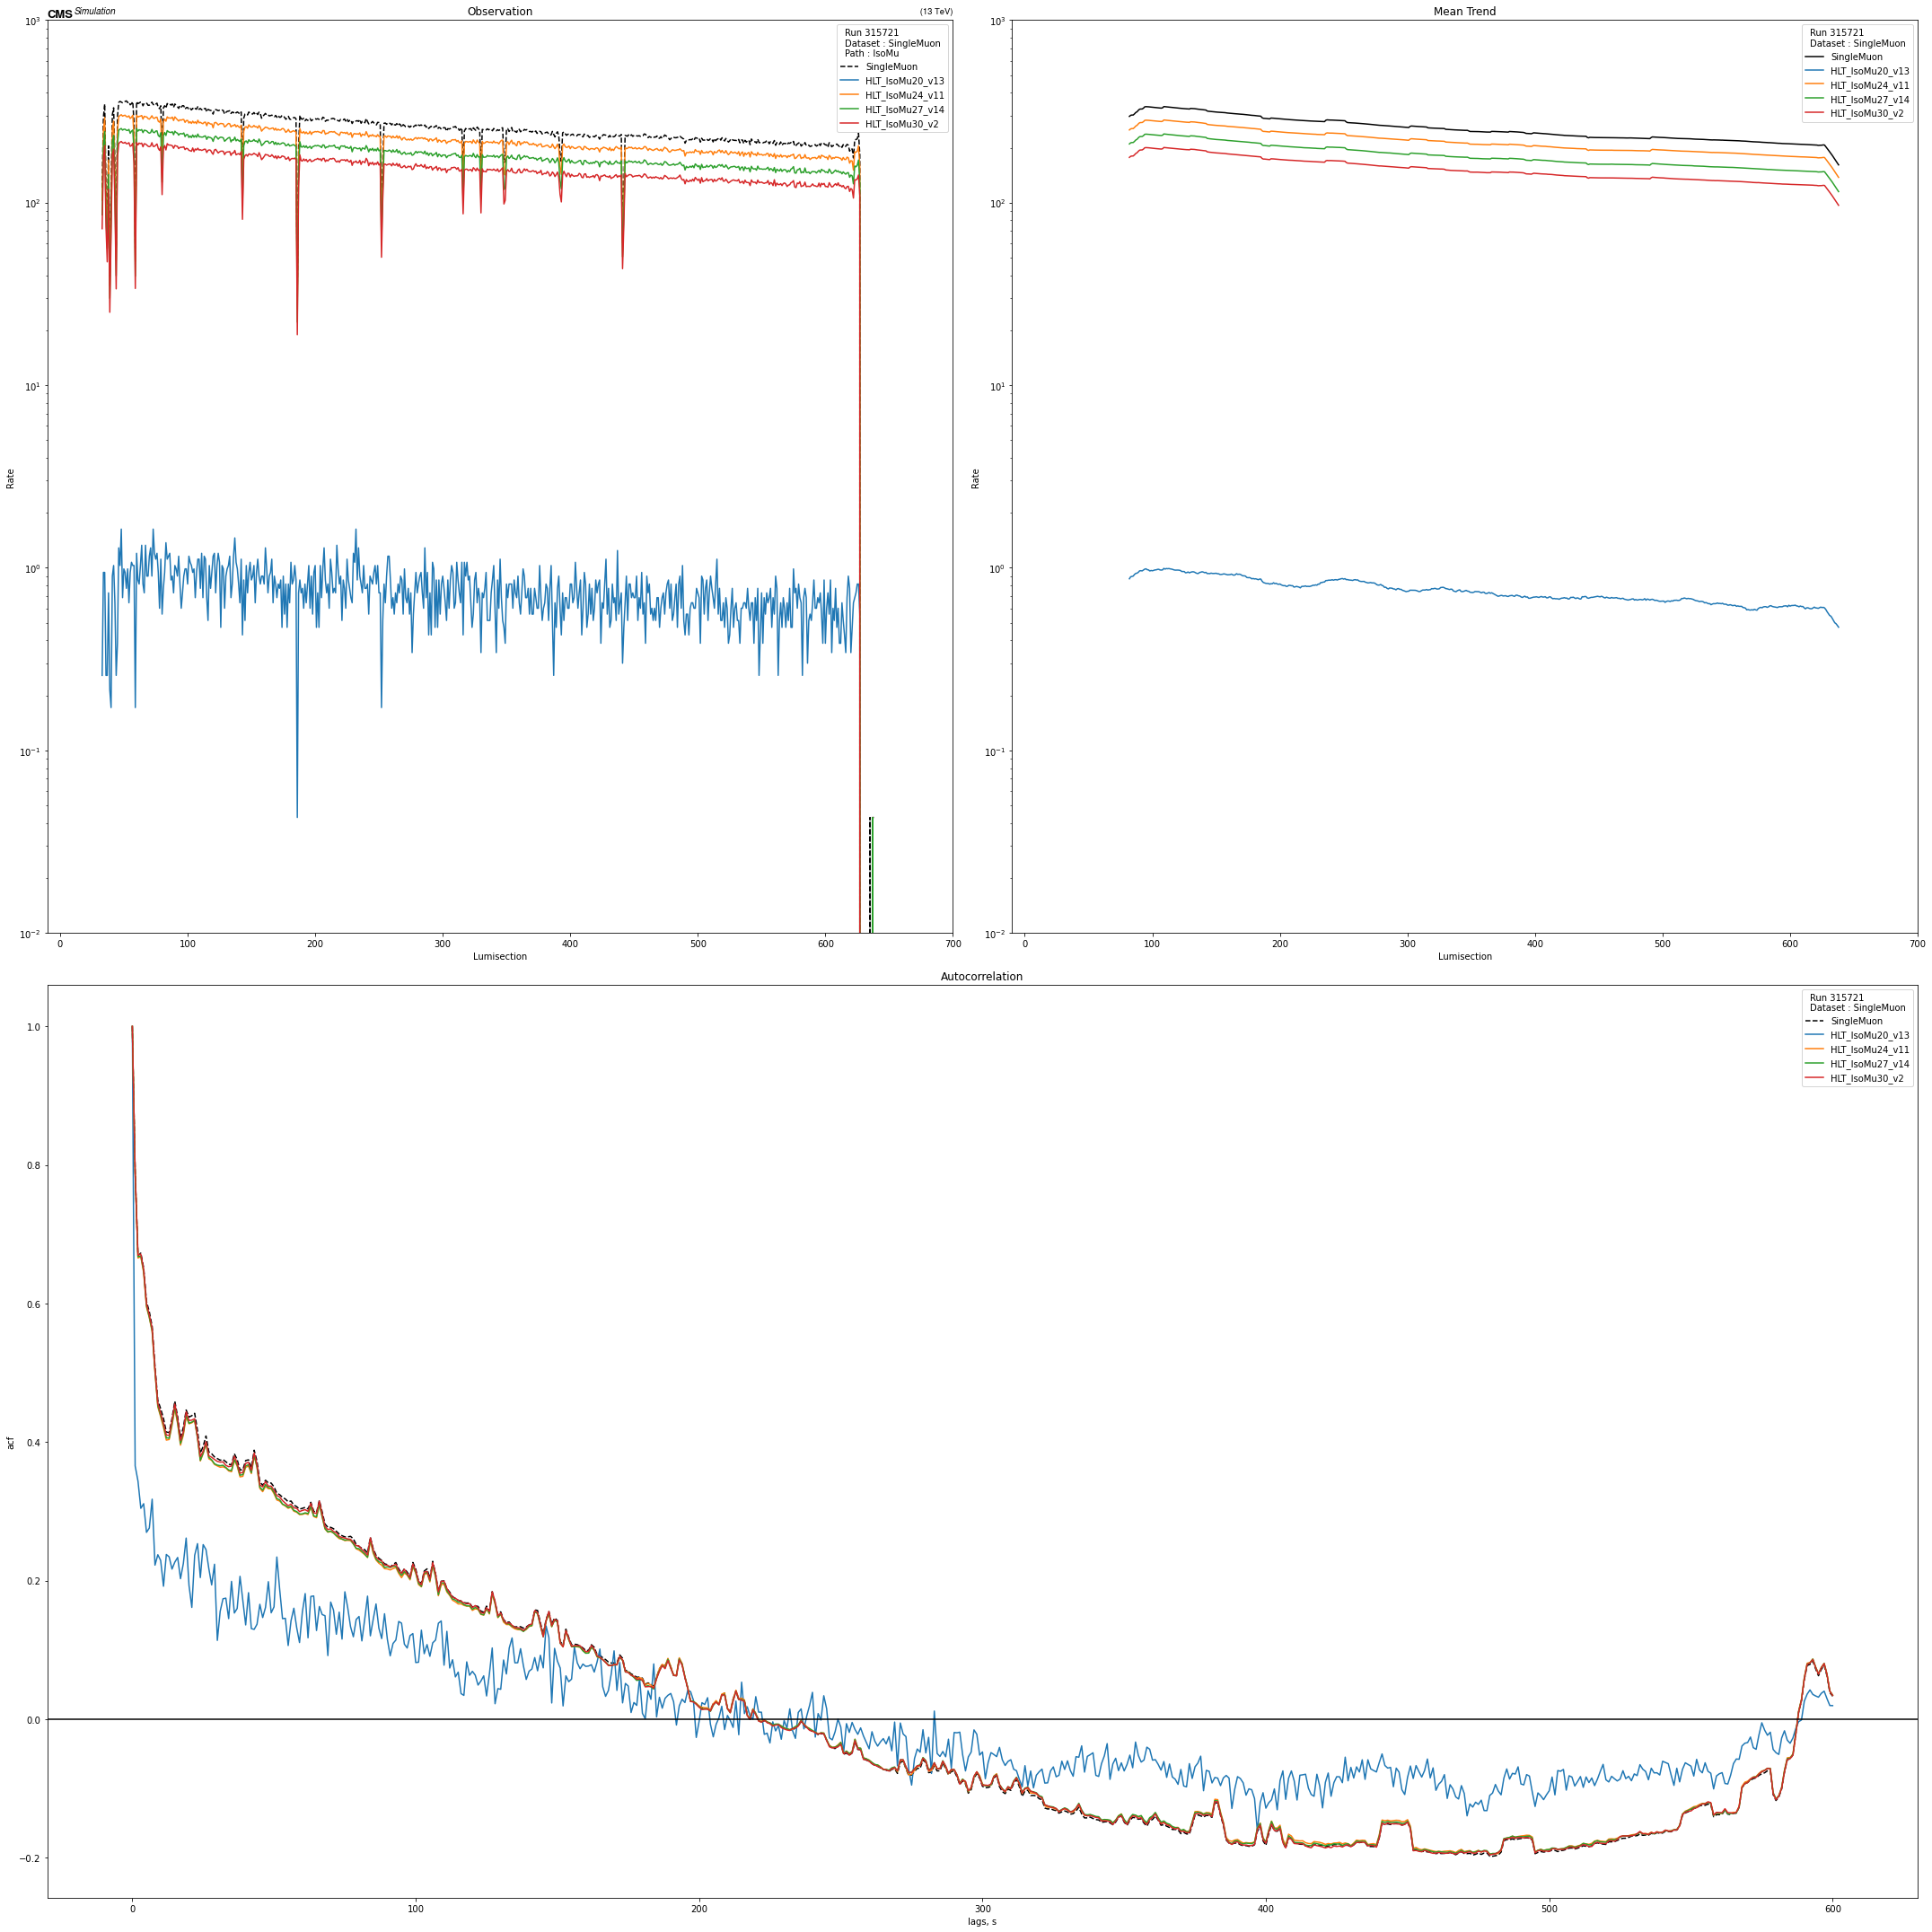

In [9]:
plot([7,9,10,11],path_name='IsoMu')

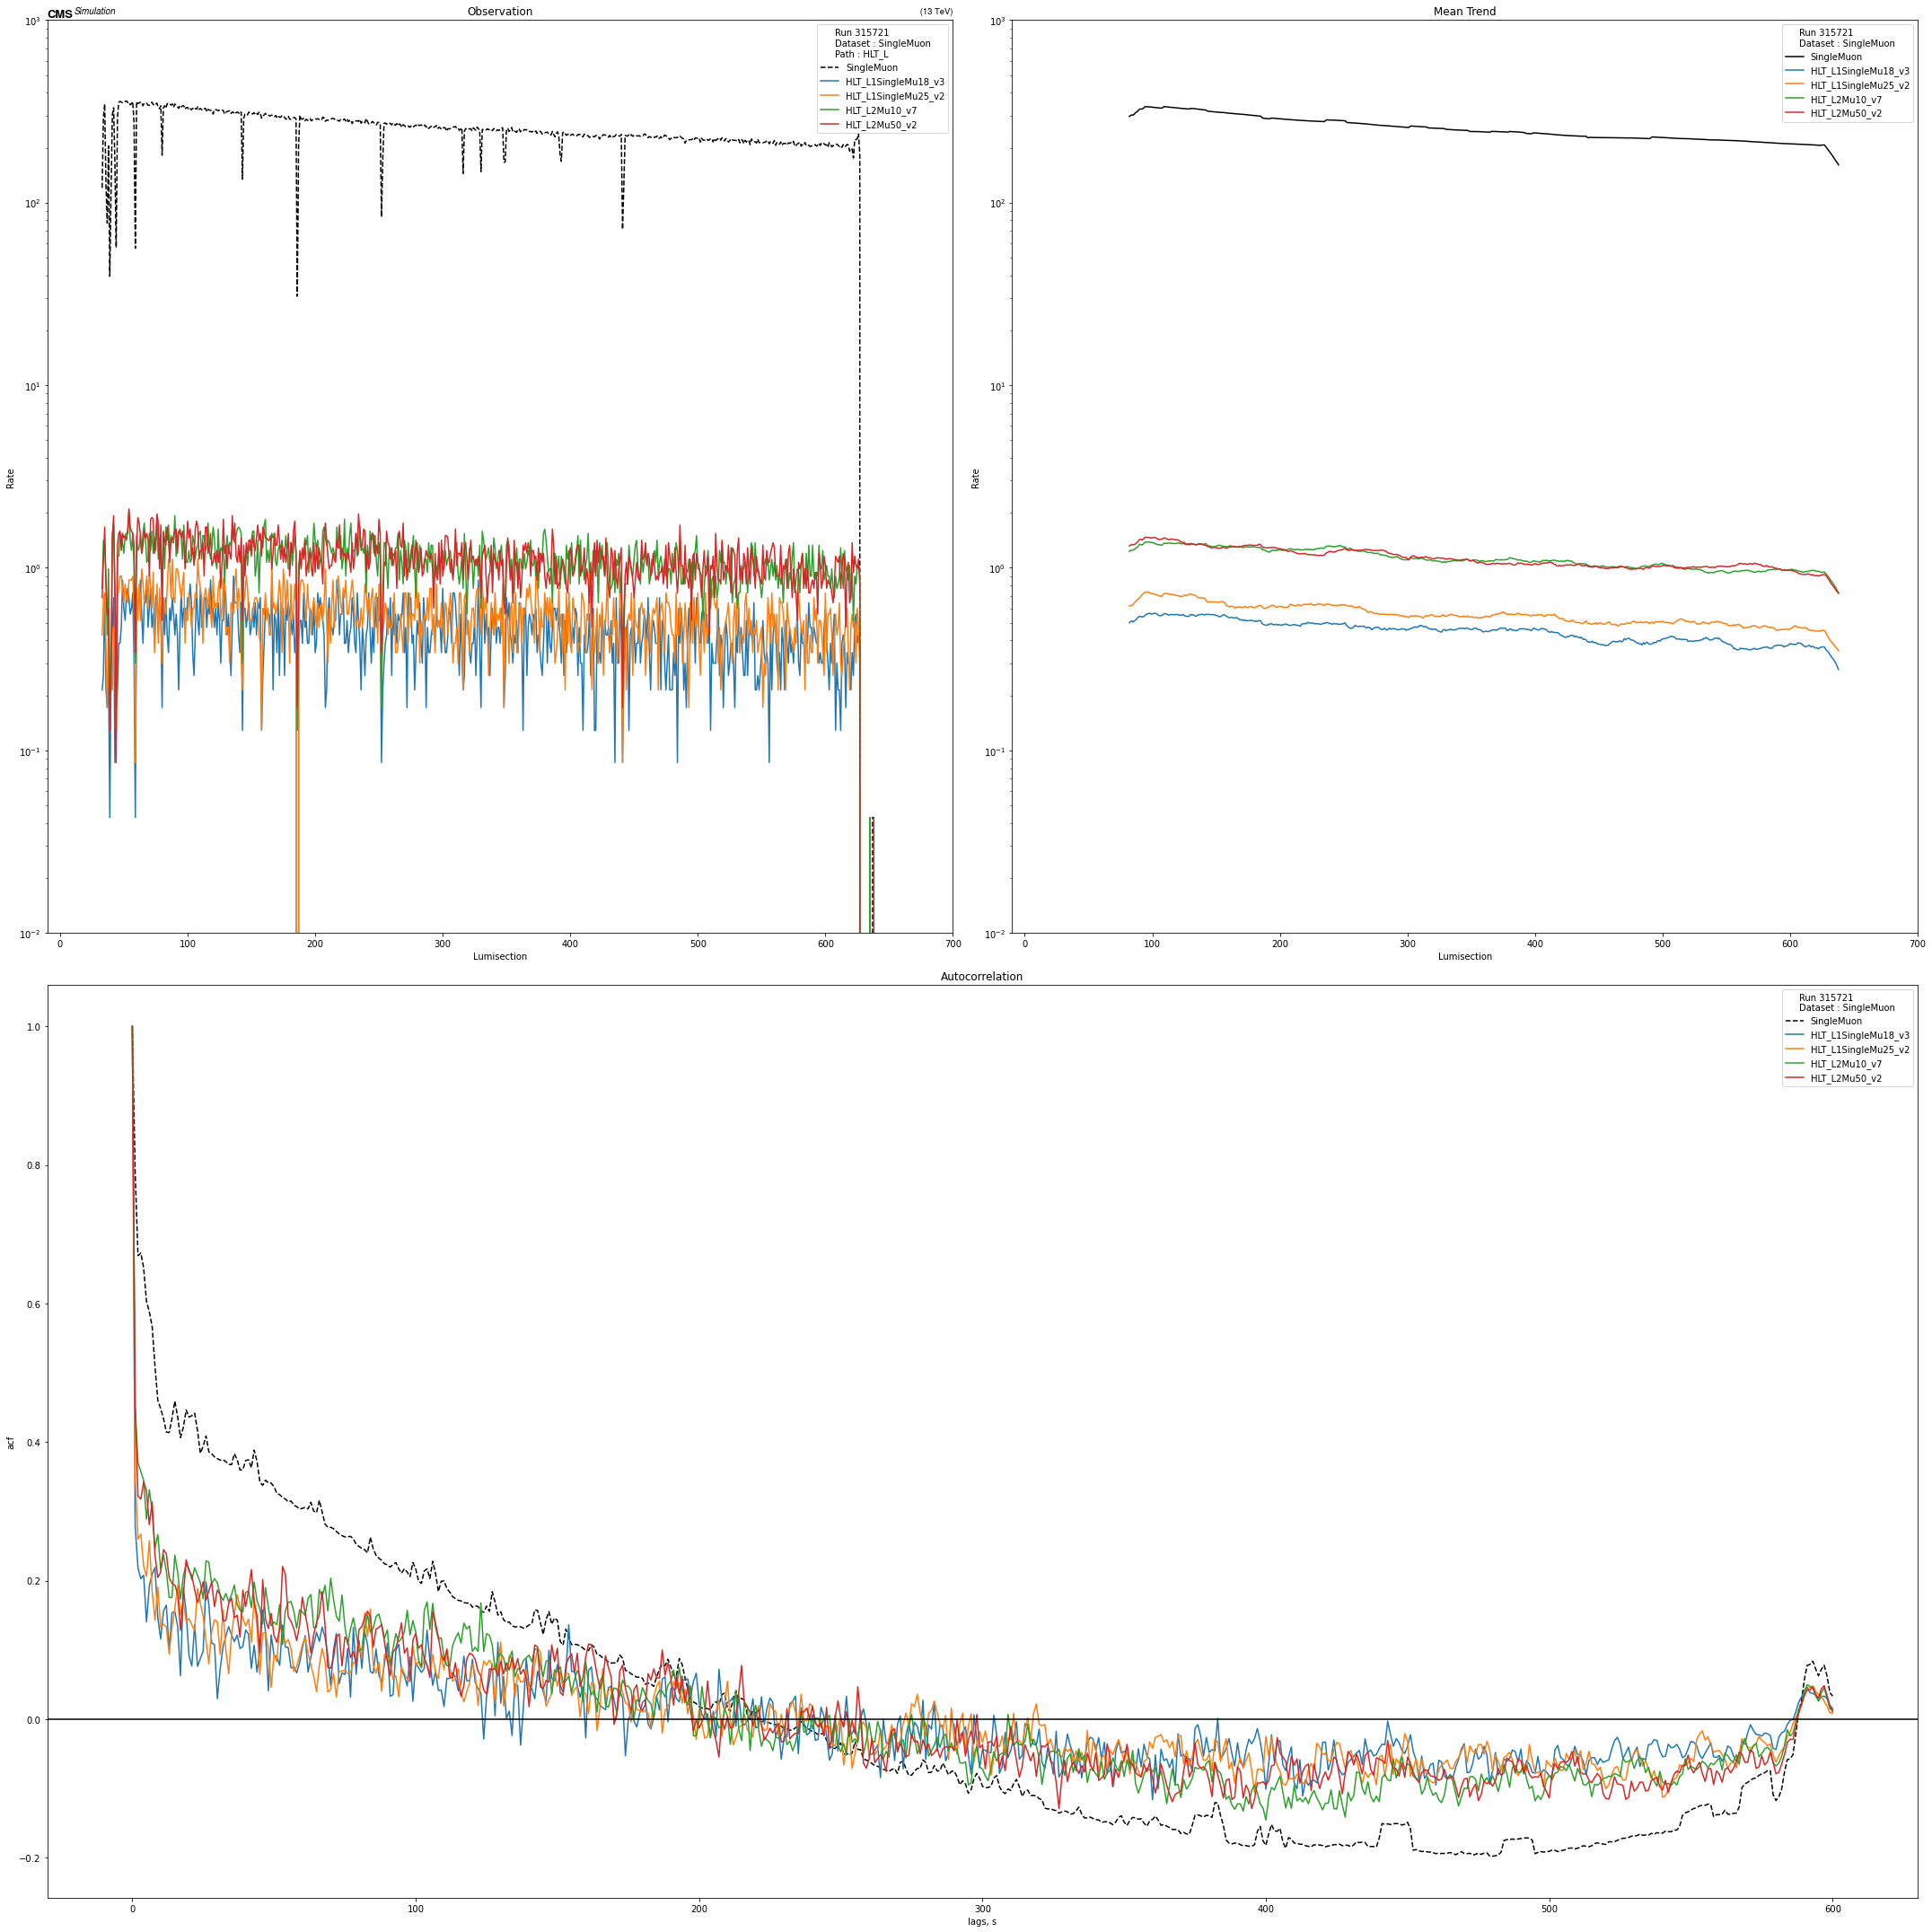

In [10]:
plot([12,13,14,15],path_name='HLT_L')

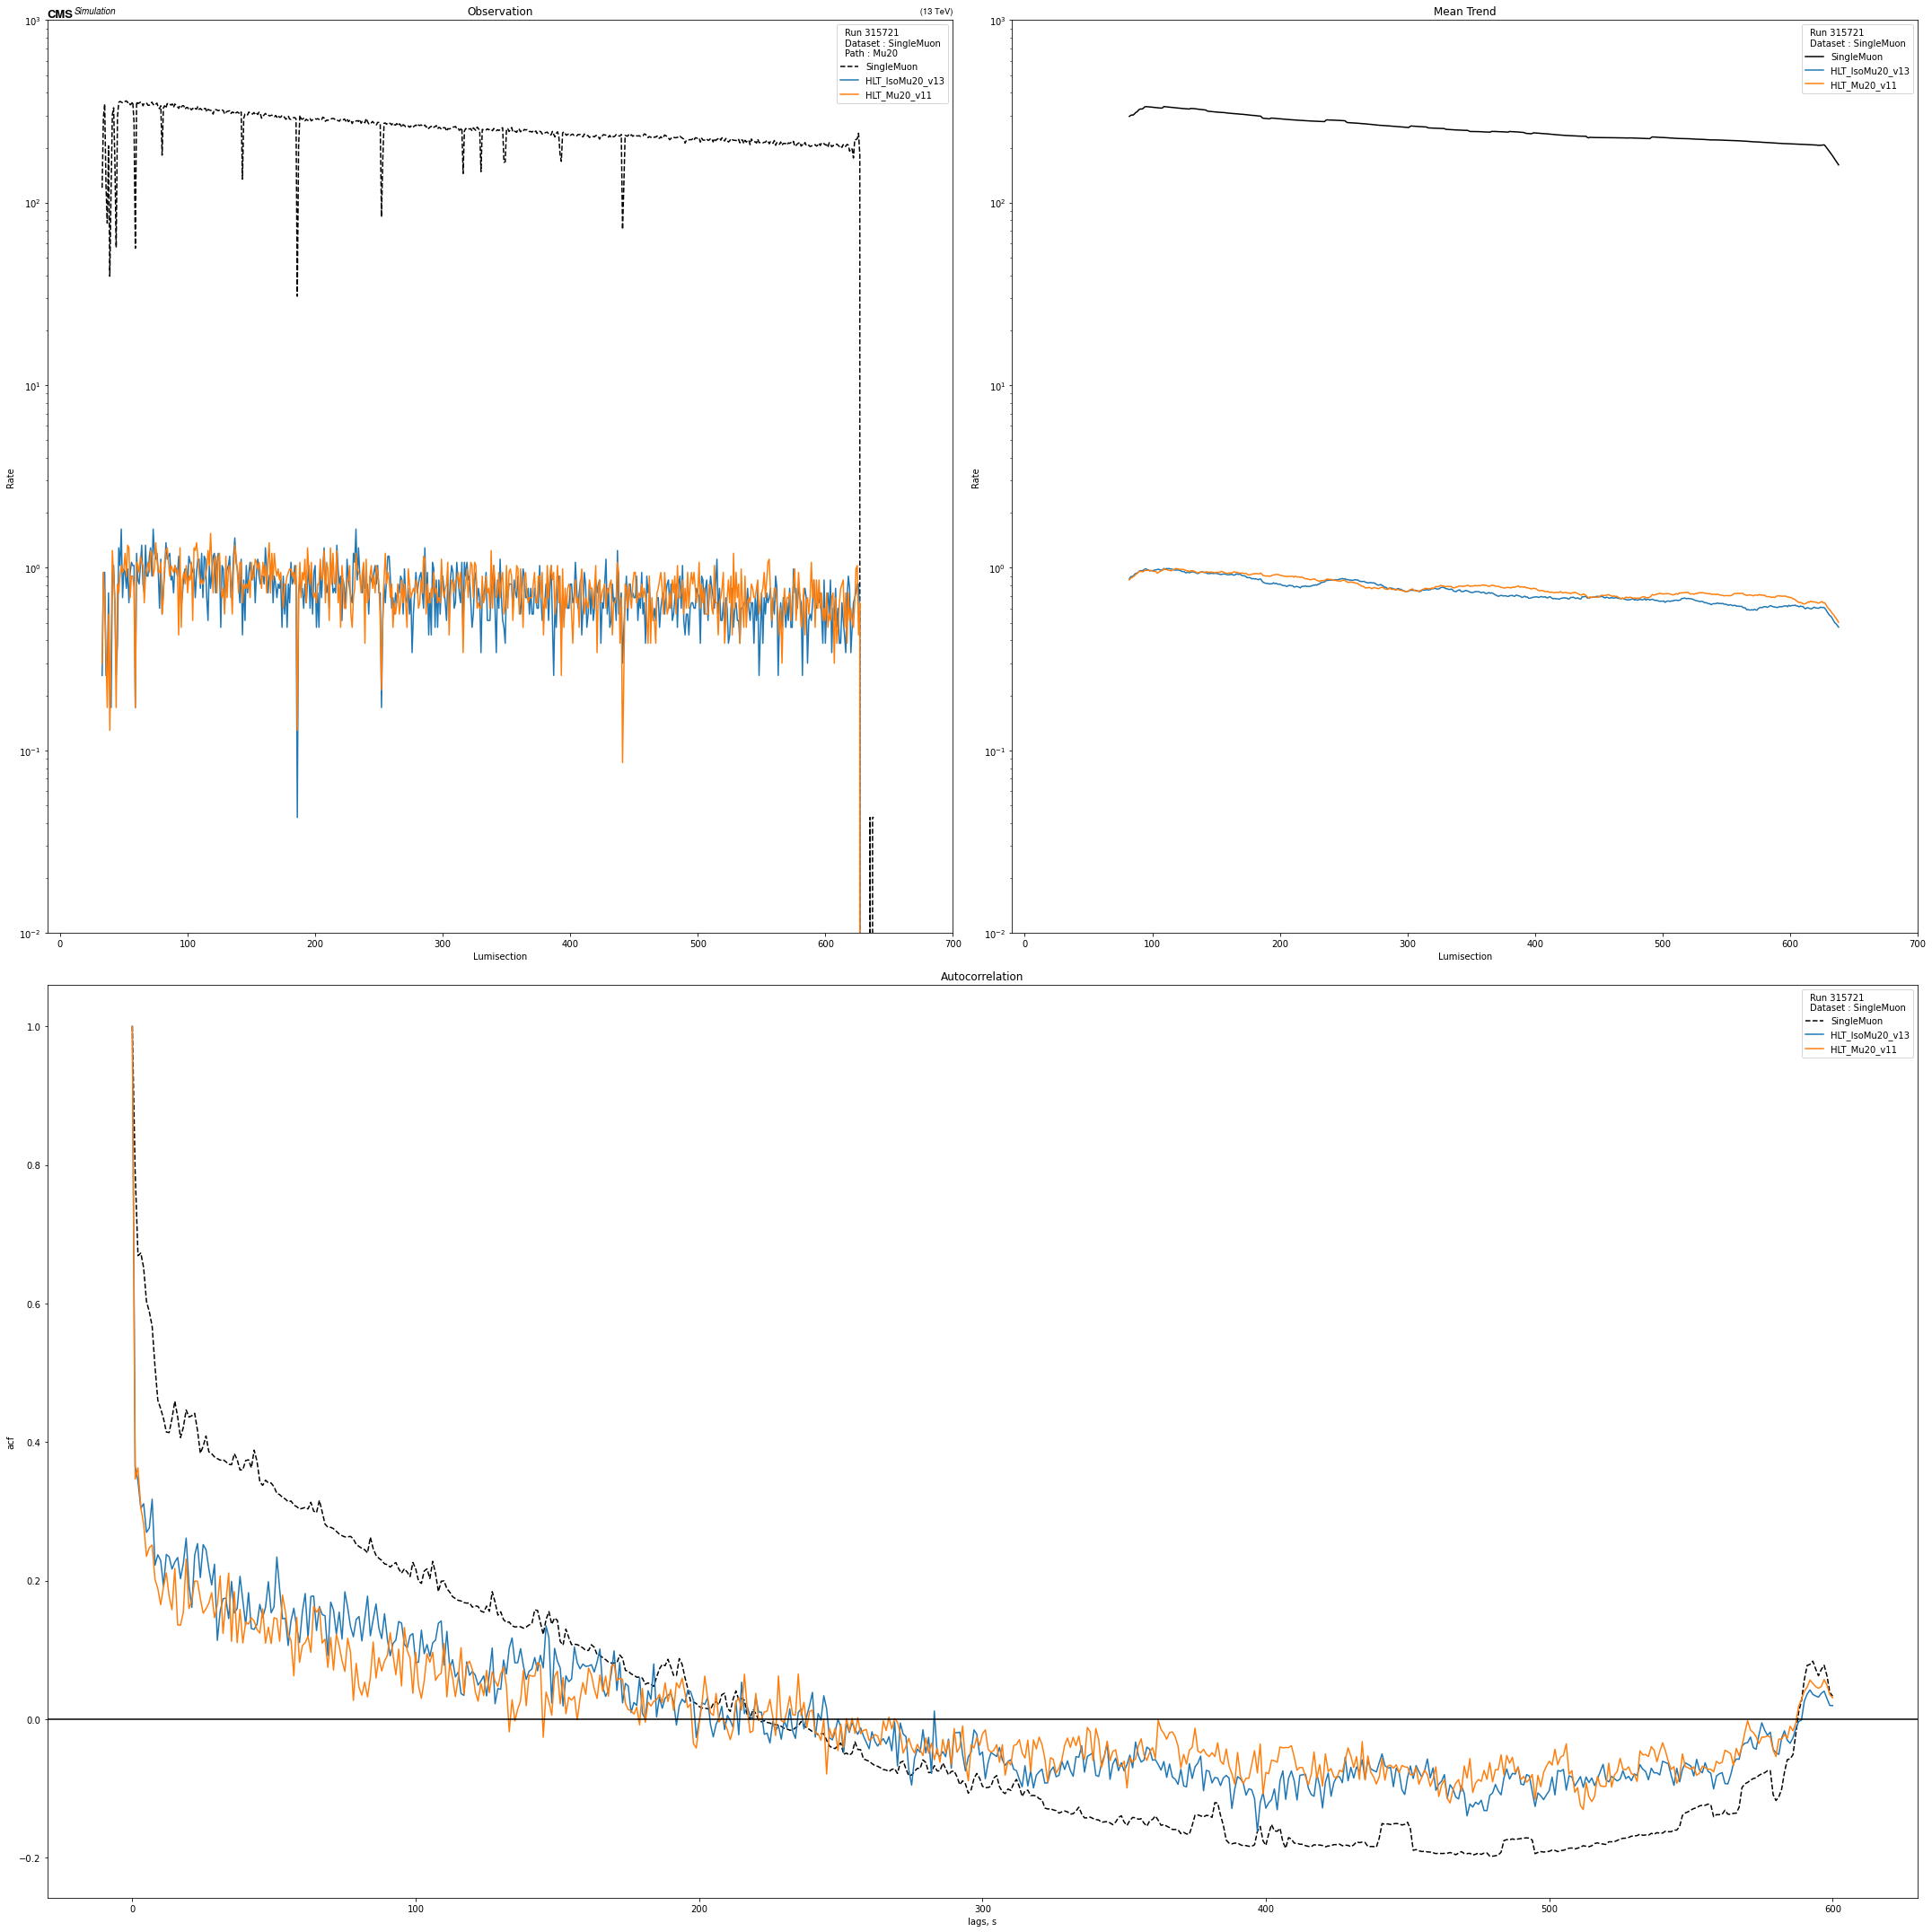

In [11]:
plot([7,23],path_name='Mu20')

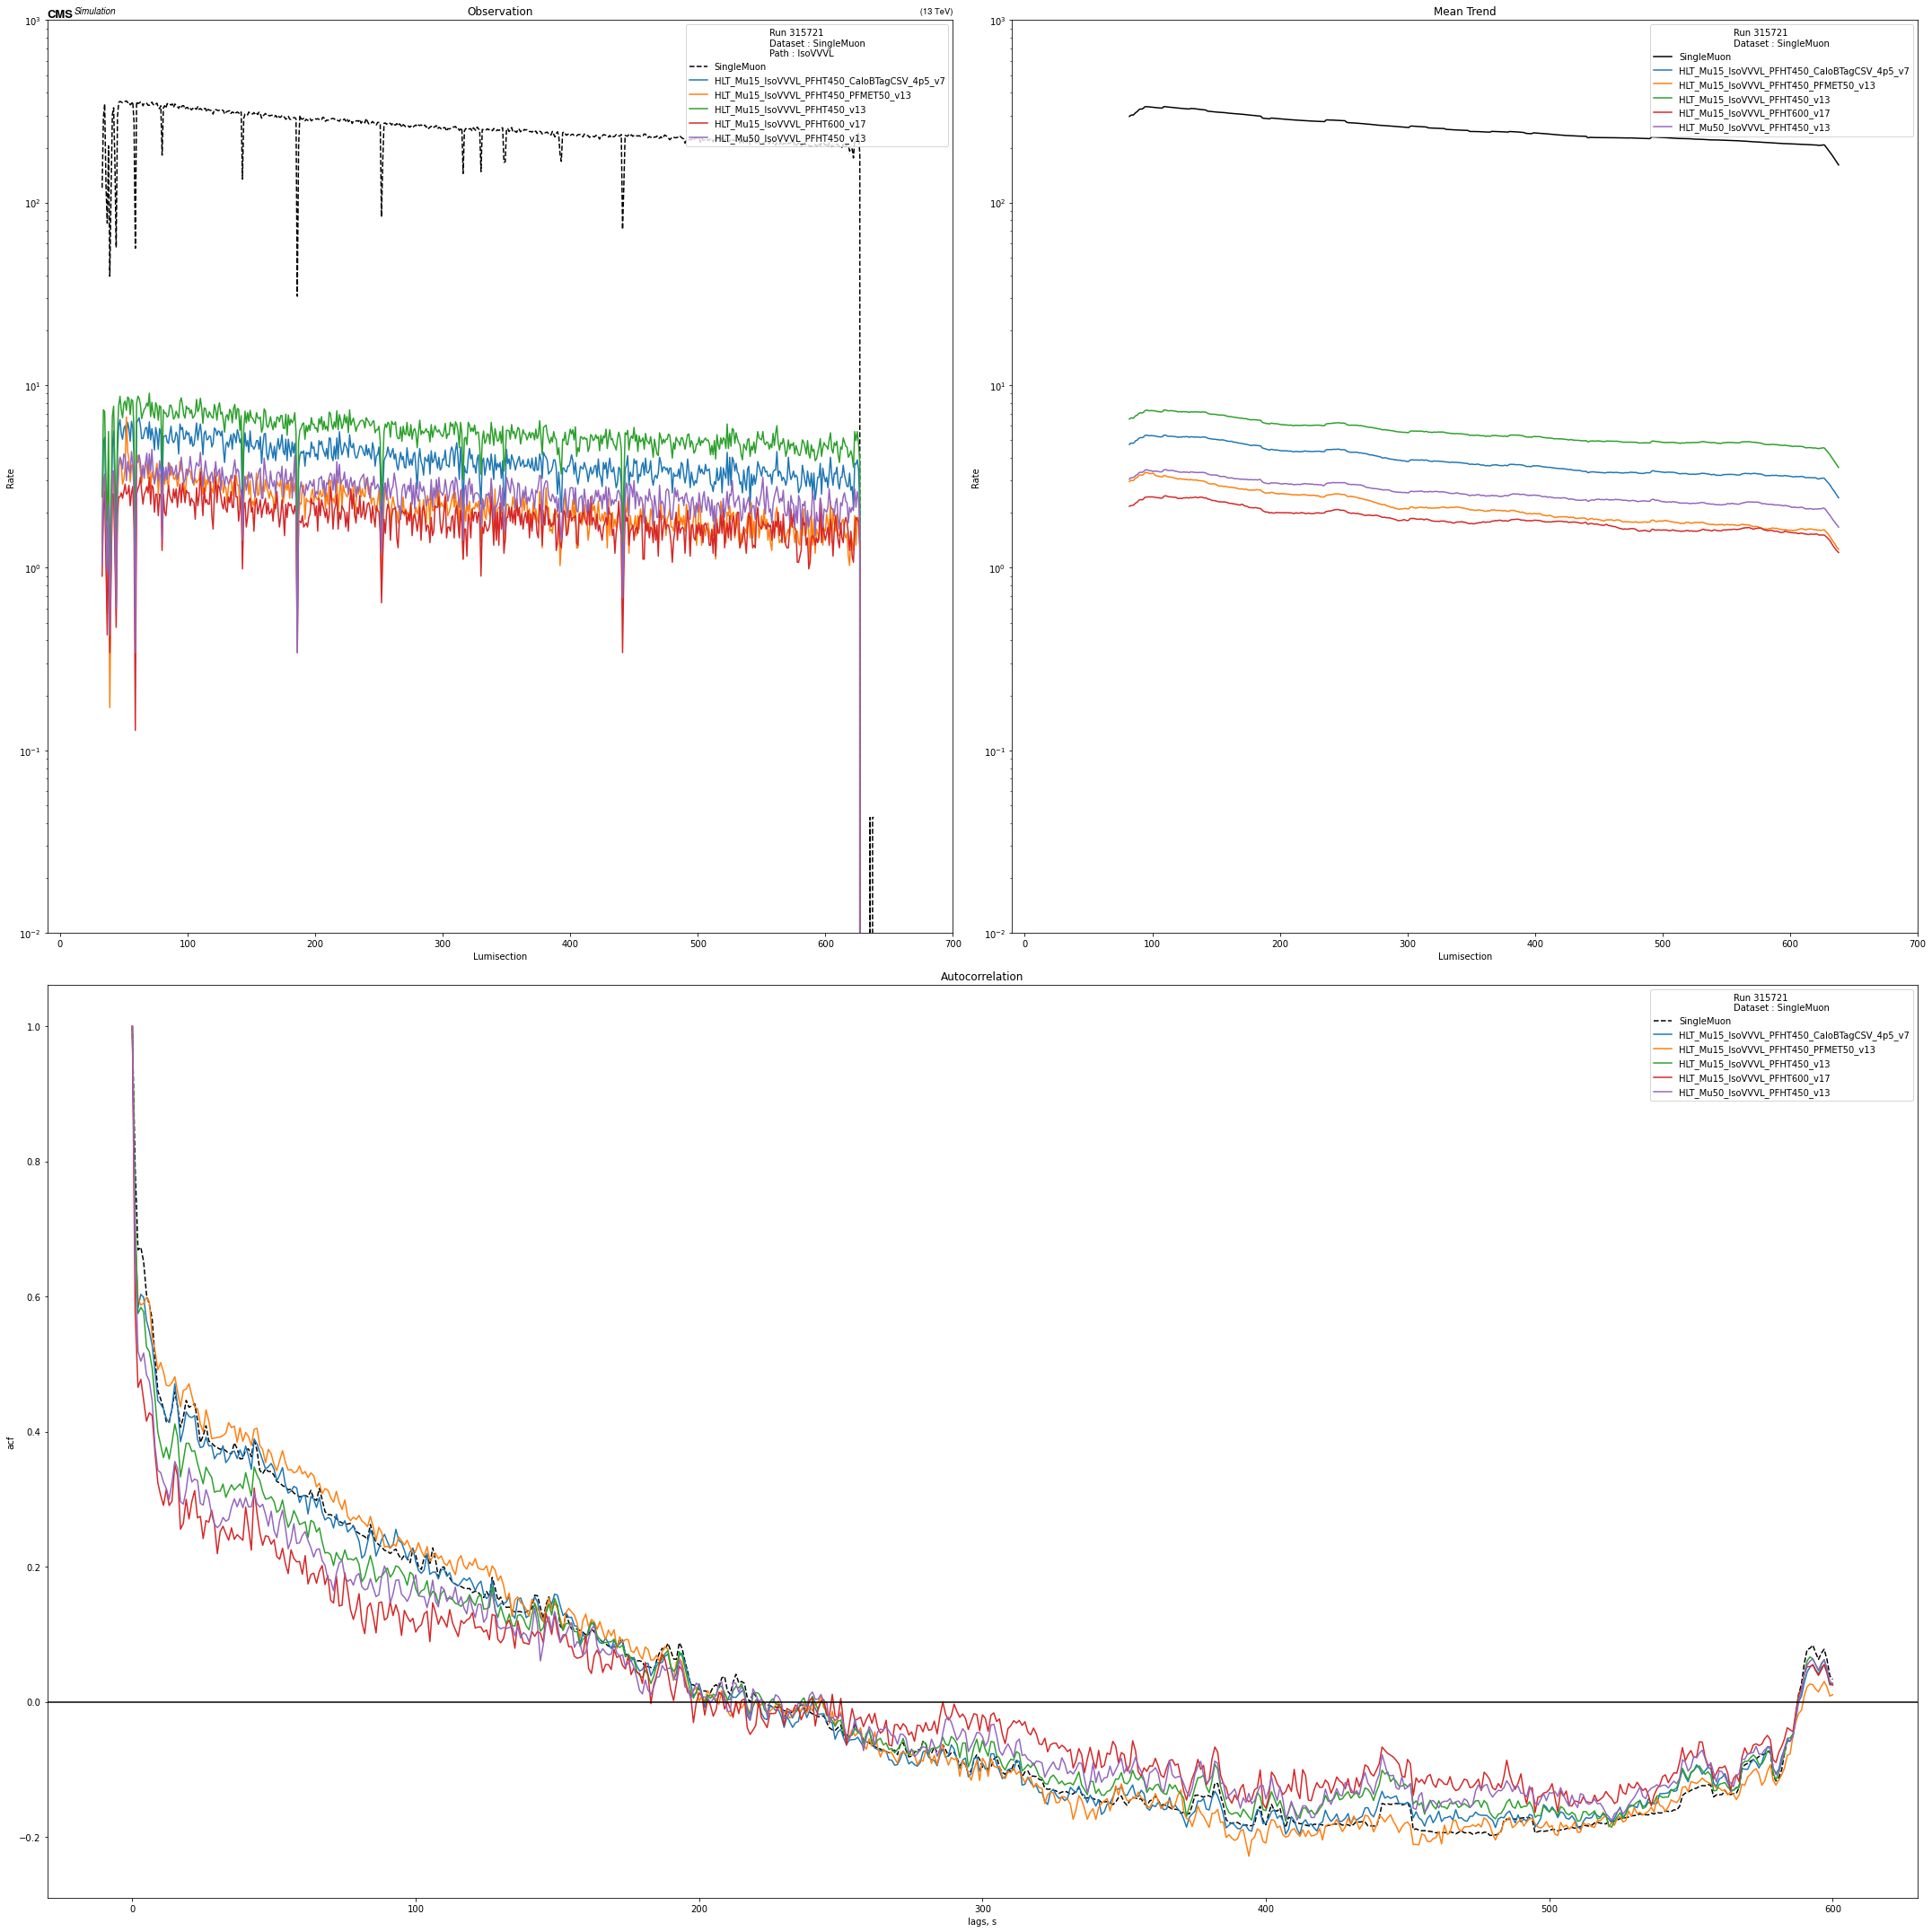

In [12]:
plot([18,19,20,21,26],path_name='IsoVVVL')

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:546: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


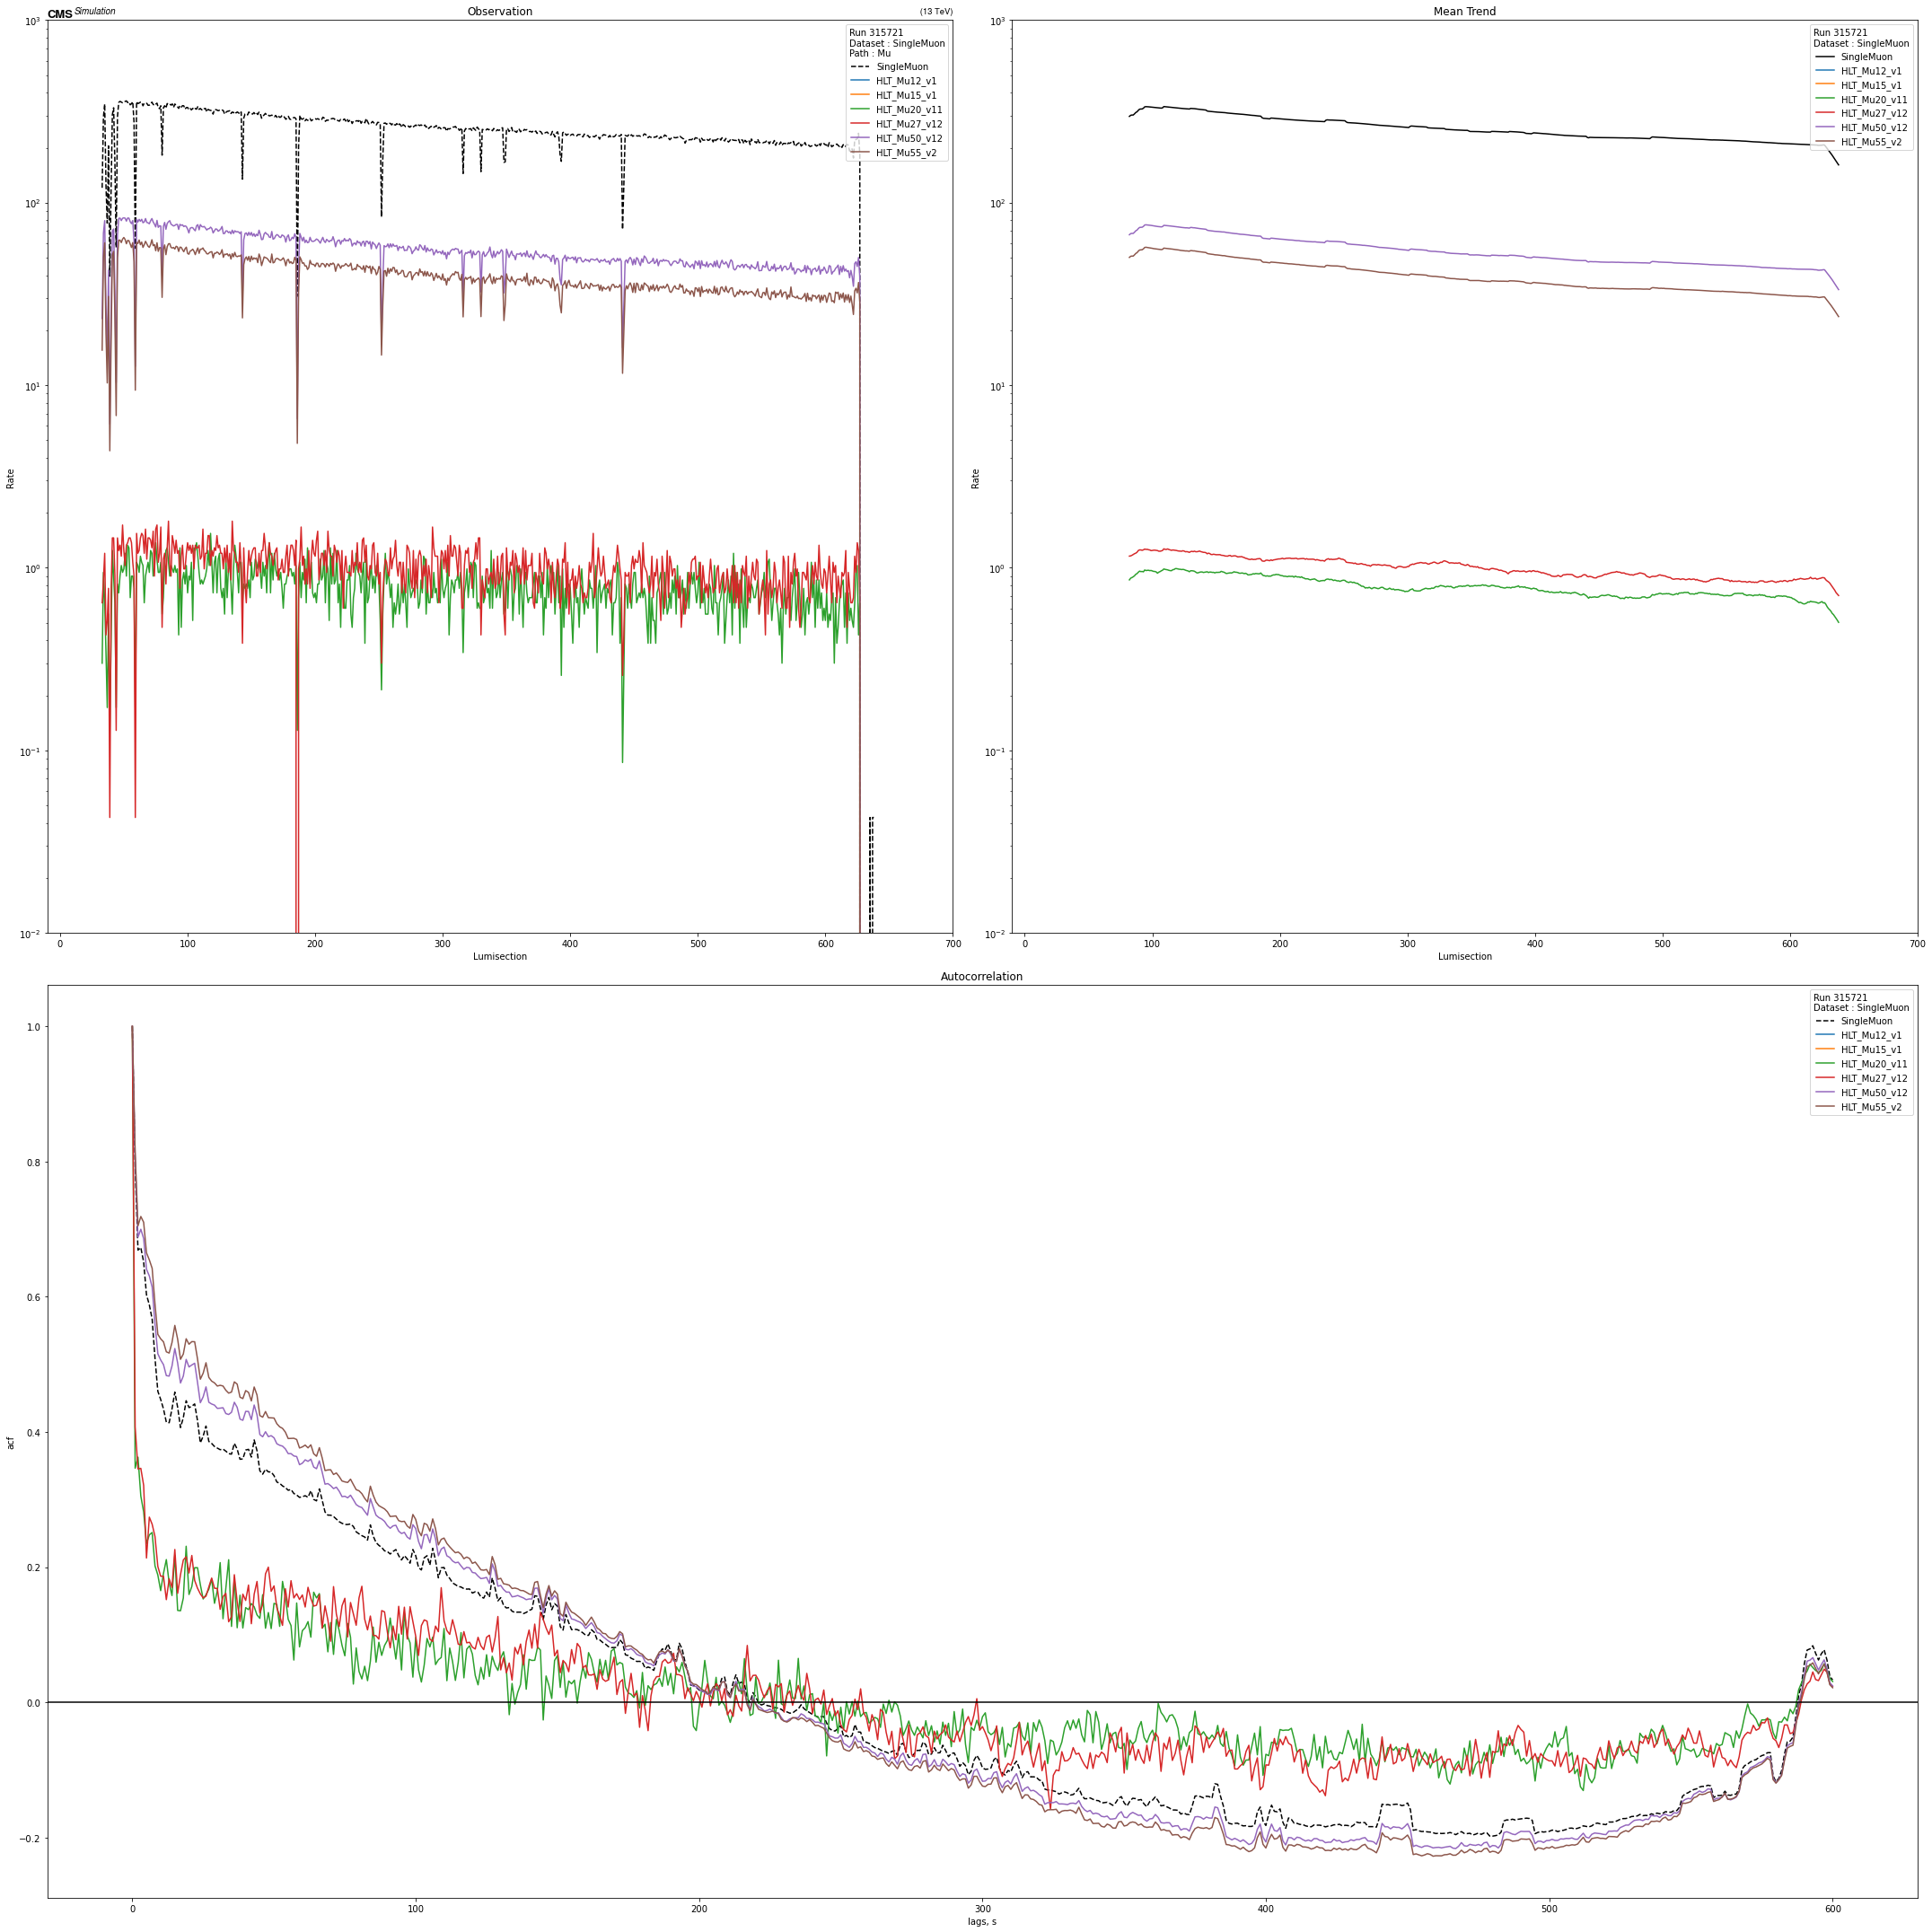

In [13]:
plot([17,22,23,24,27,28],path_name='Mu')

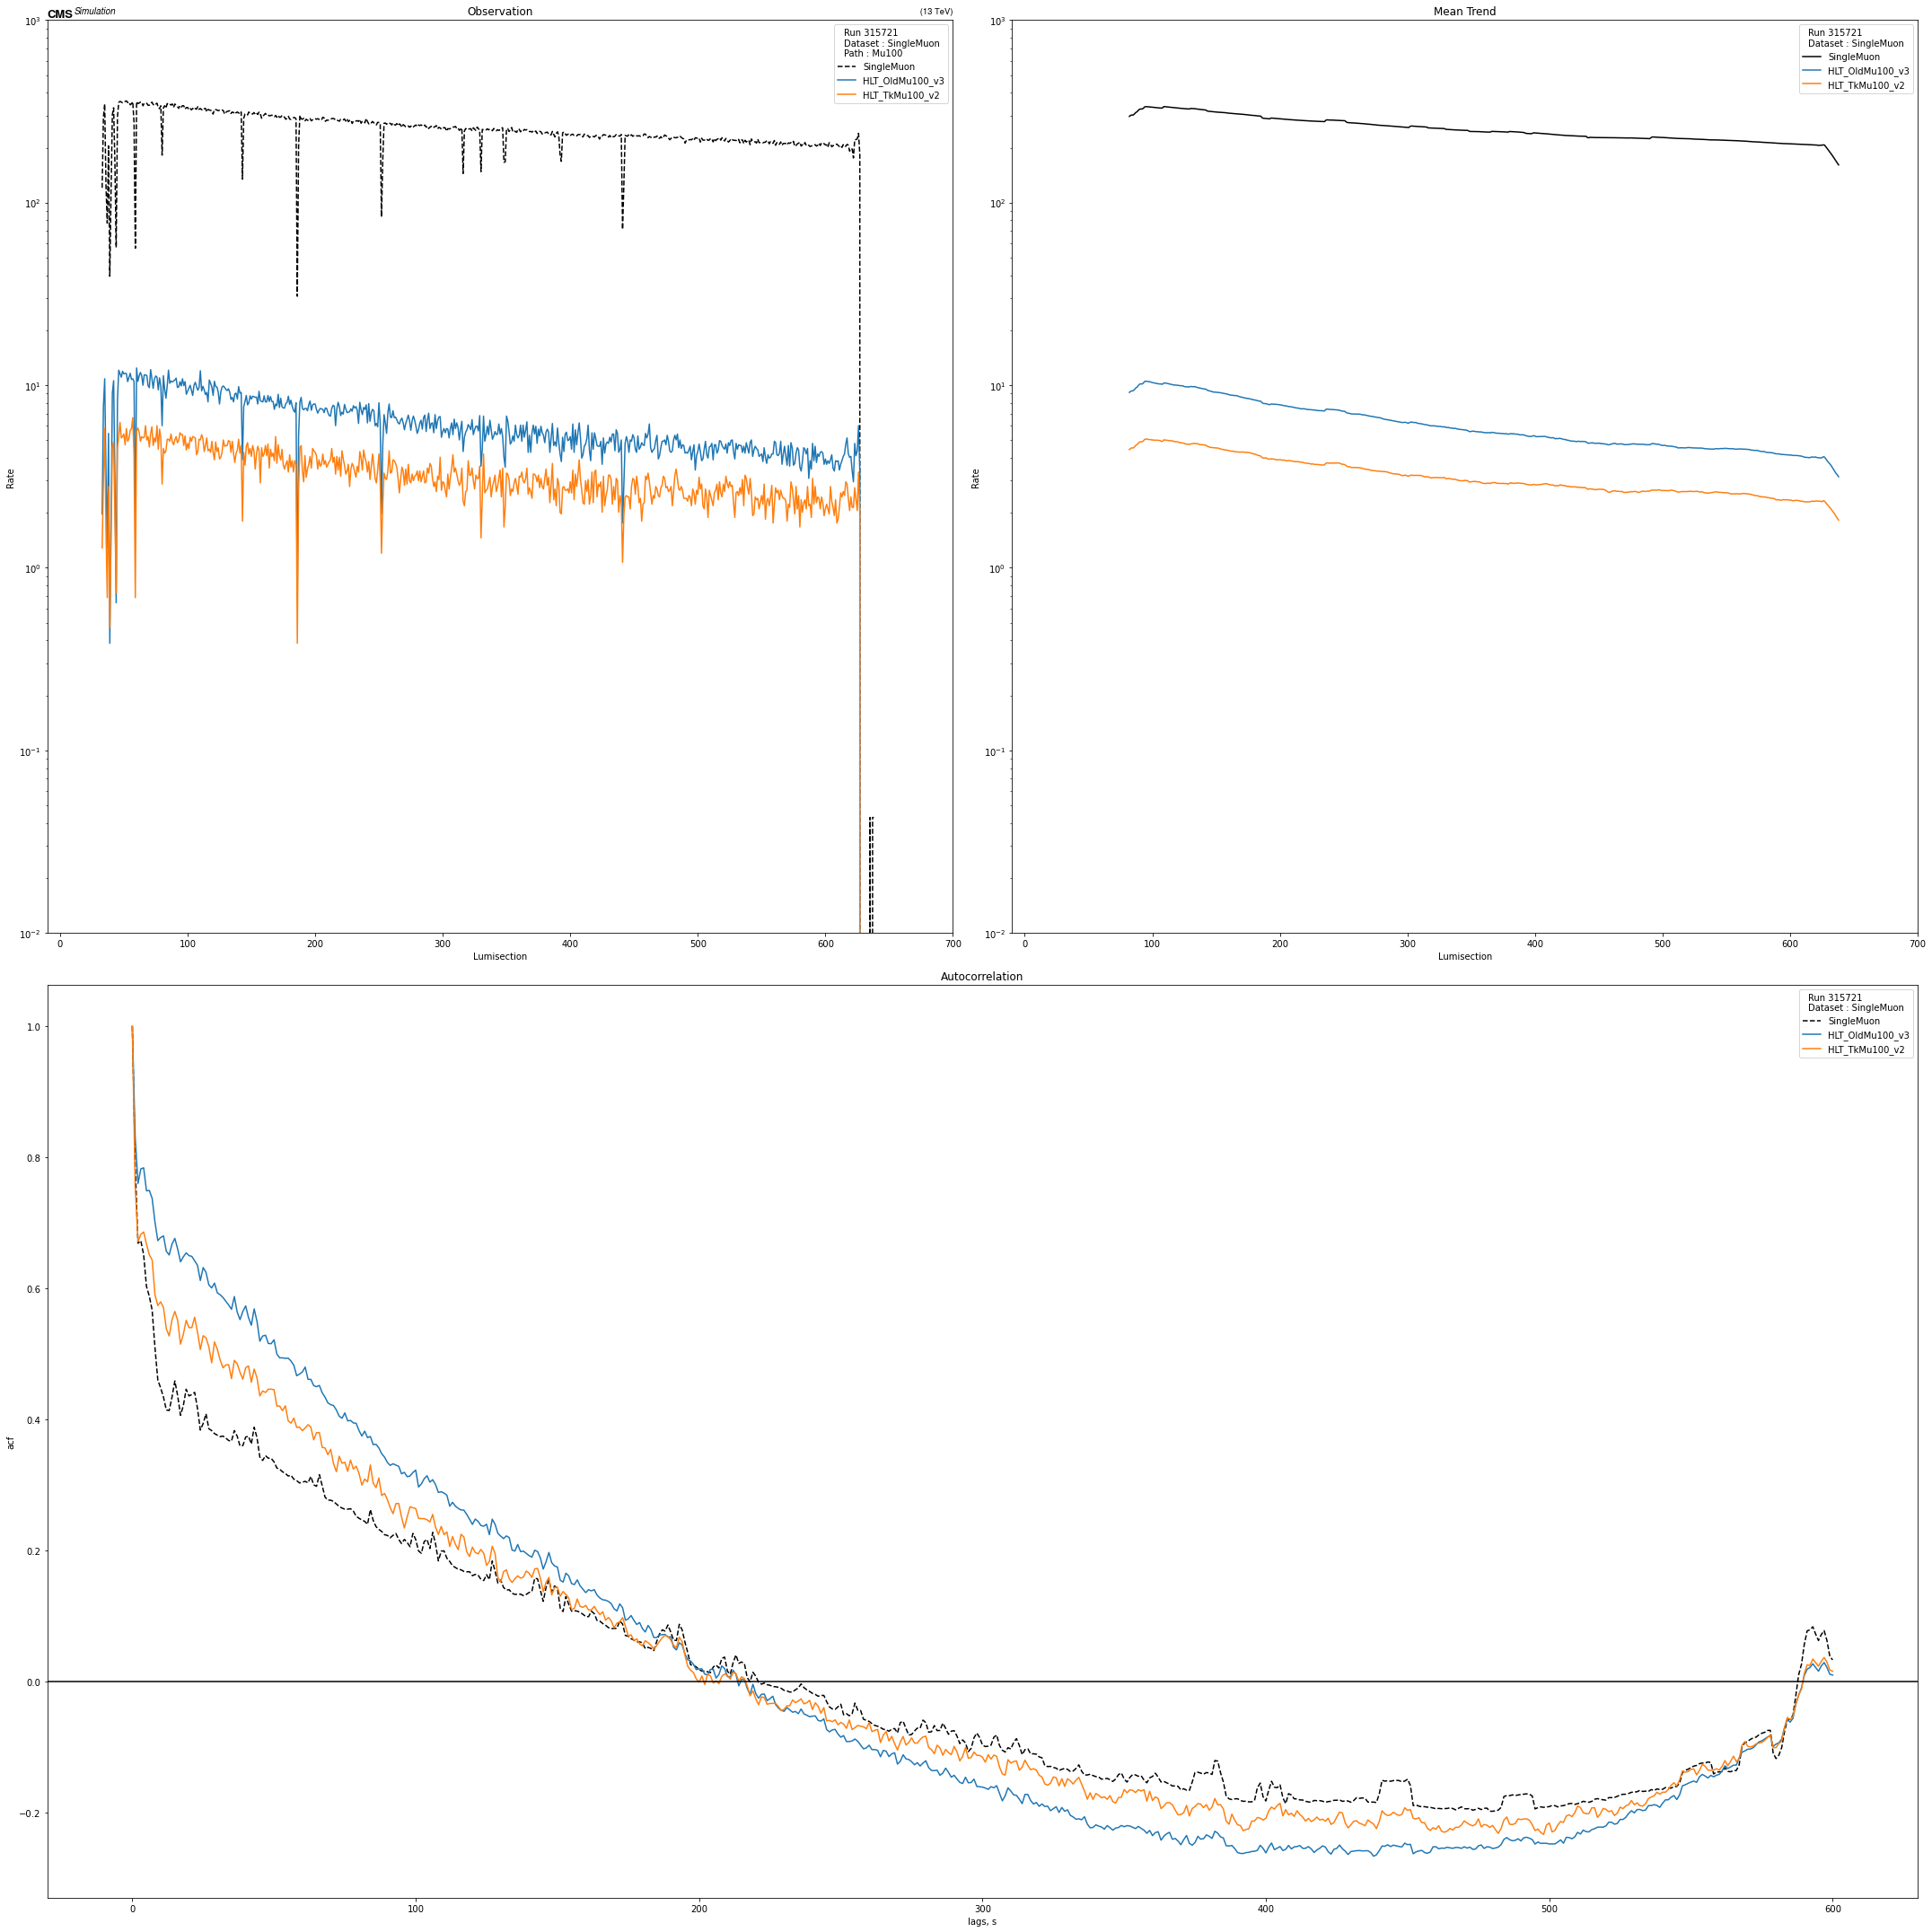

In [14]:
plot([30,31],path_name='Mu100')

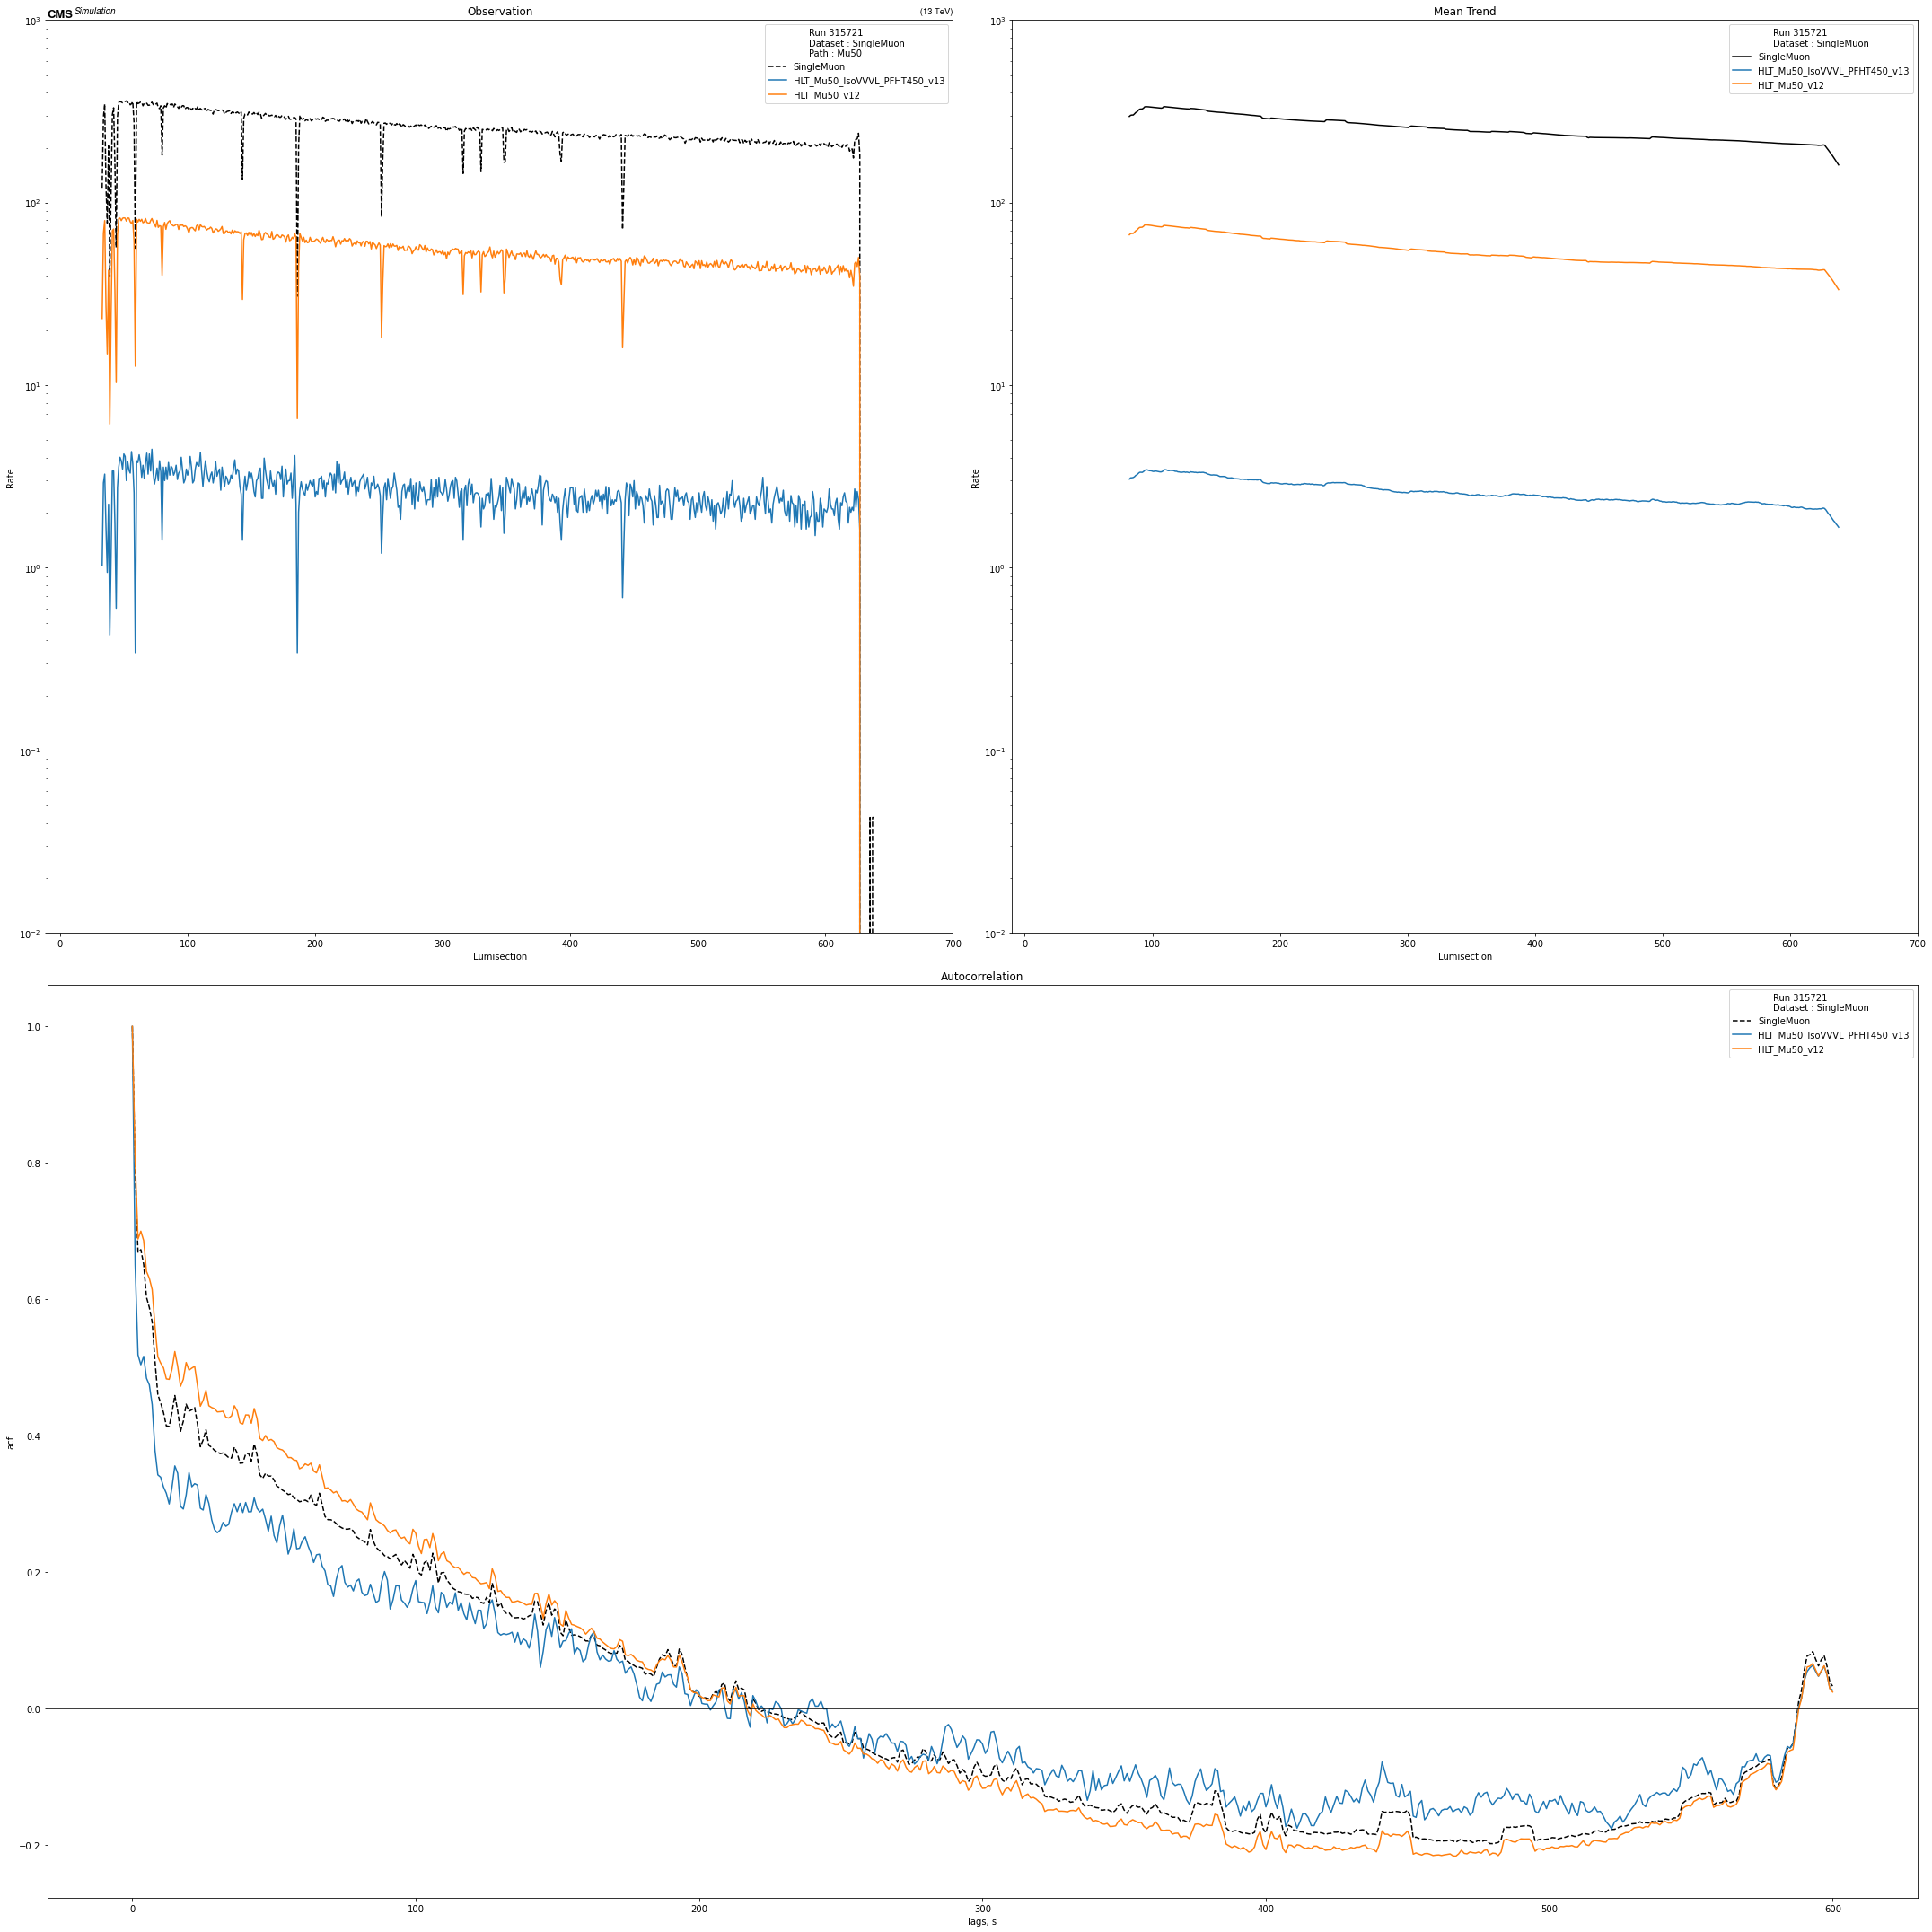

In [15]:
plot([26,27],path_name='Mu50')

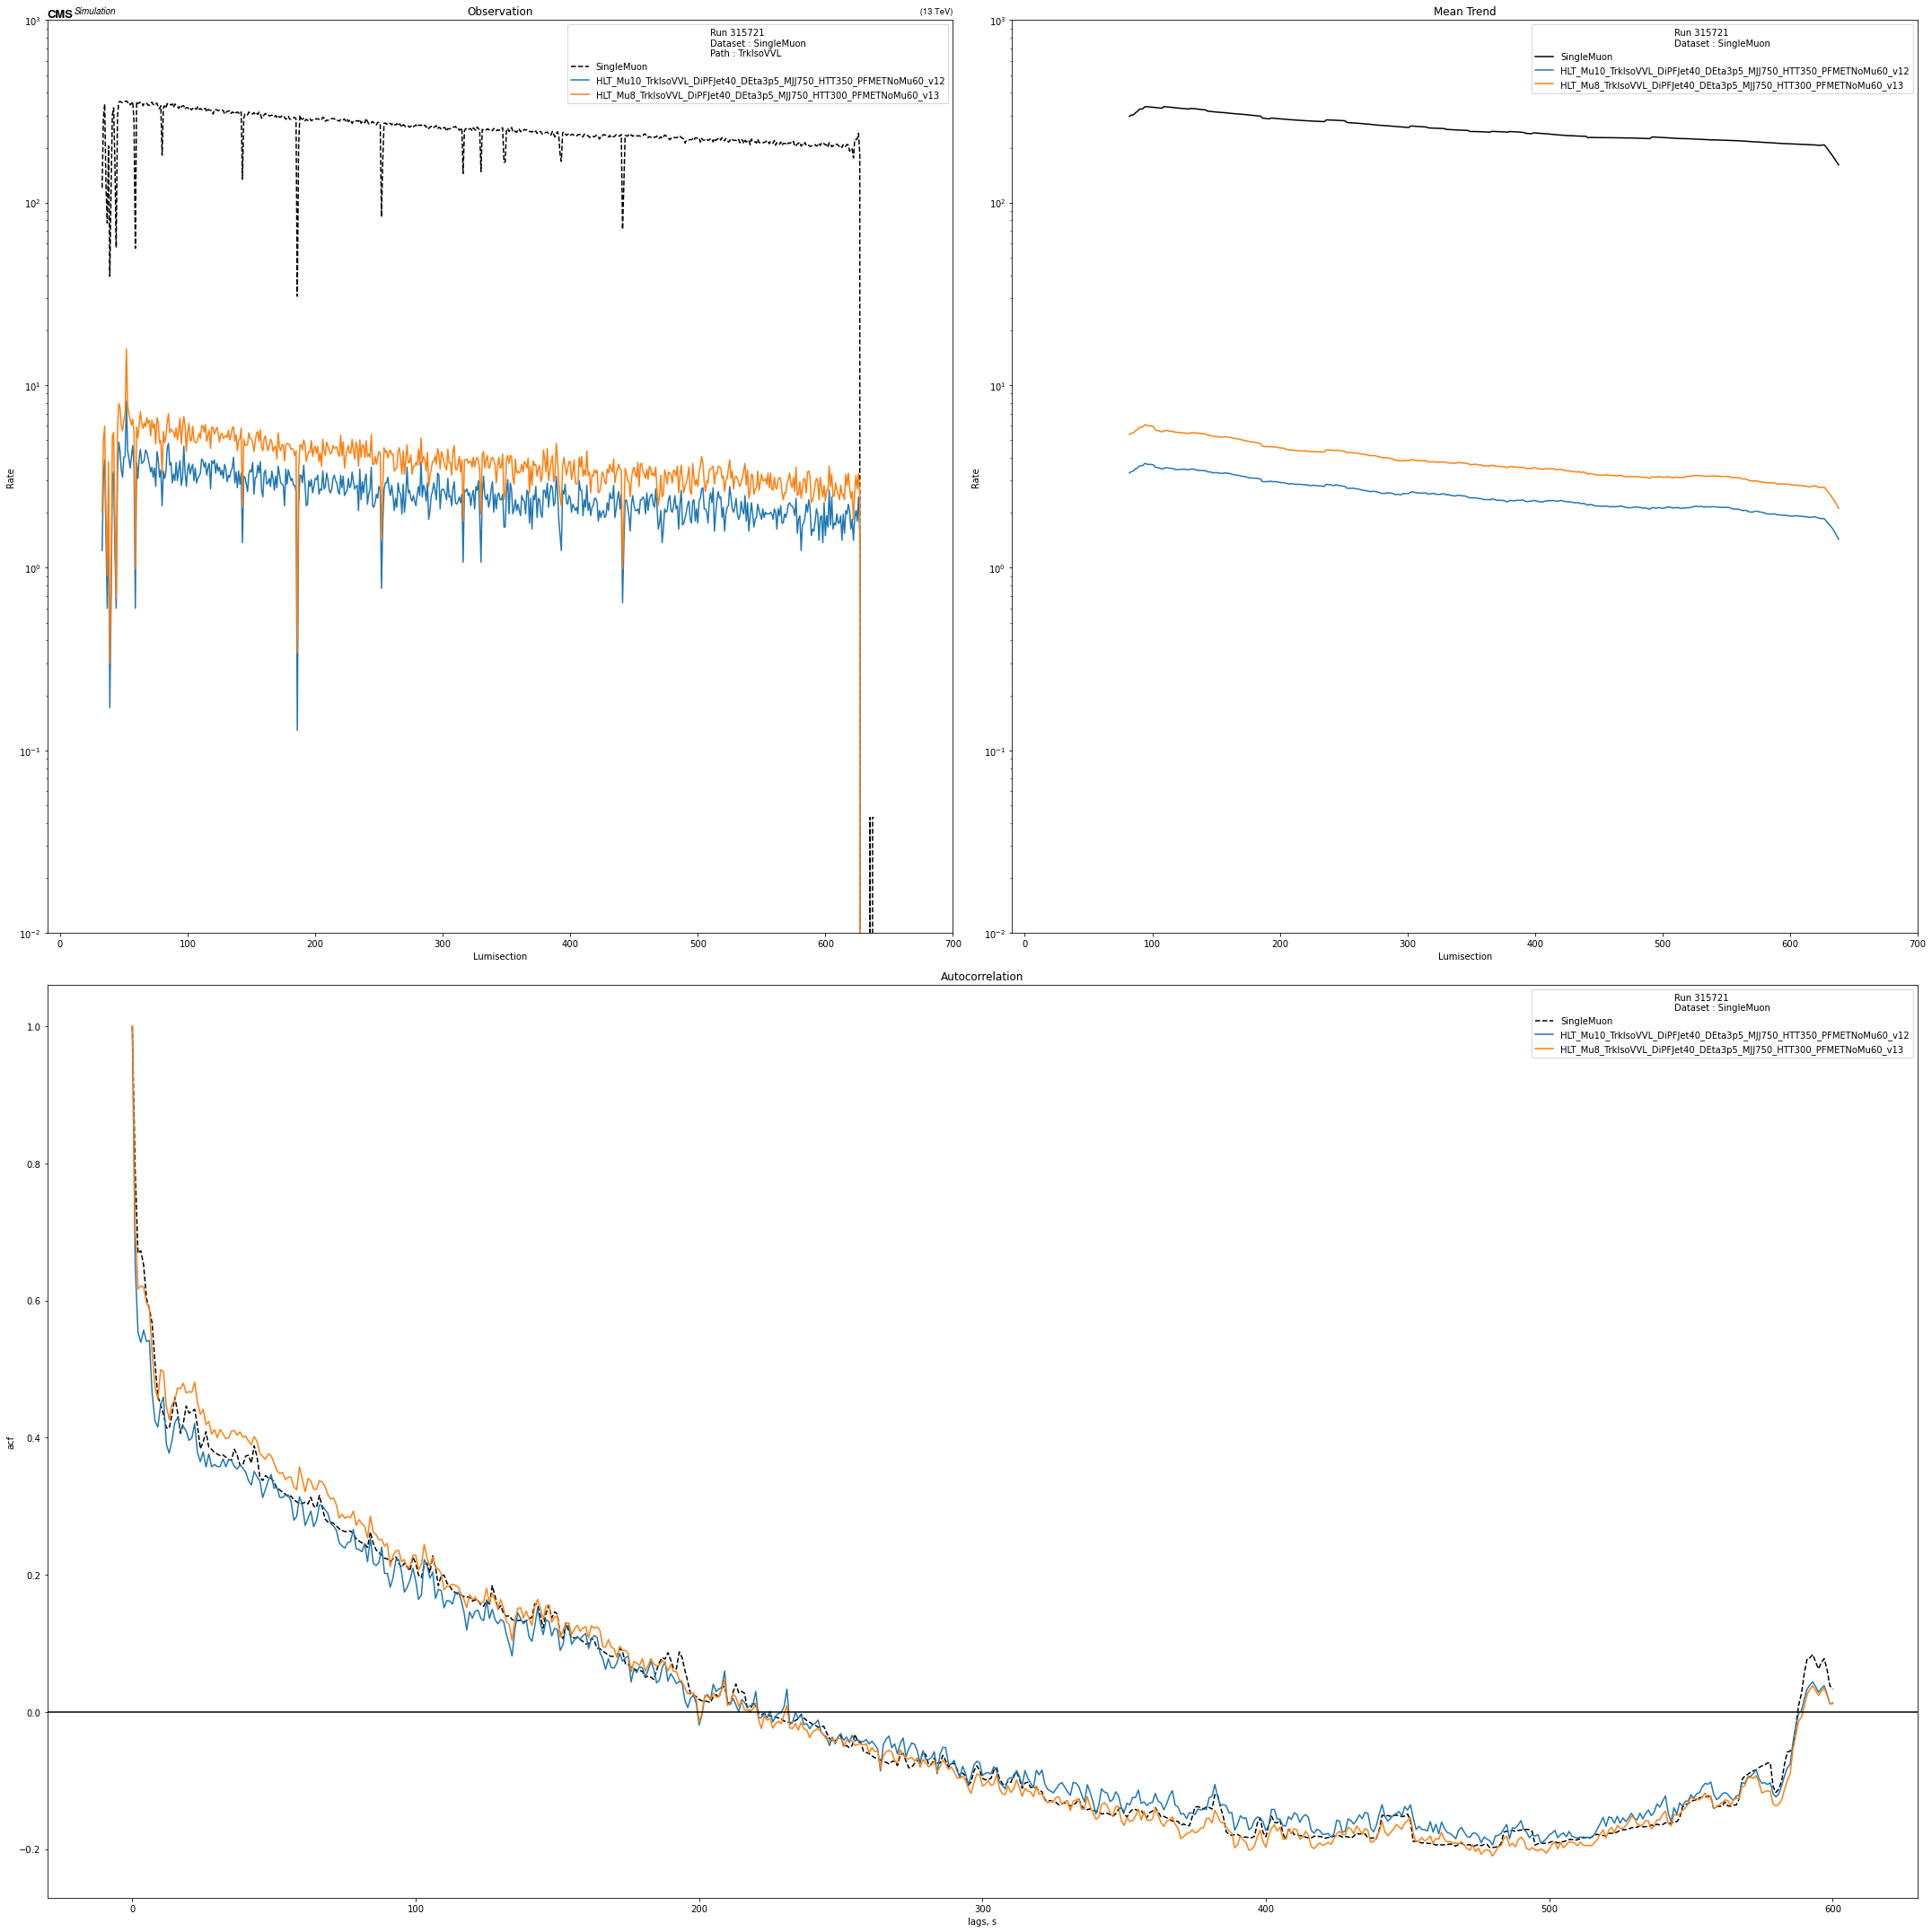

In [16]:
plot([16,29],path_name='TrkIsoVVL')

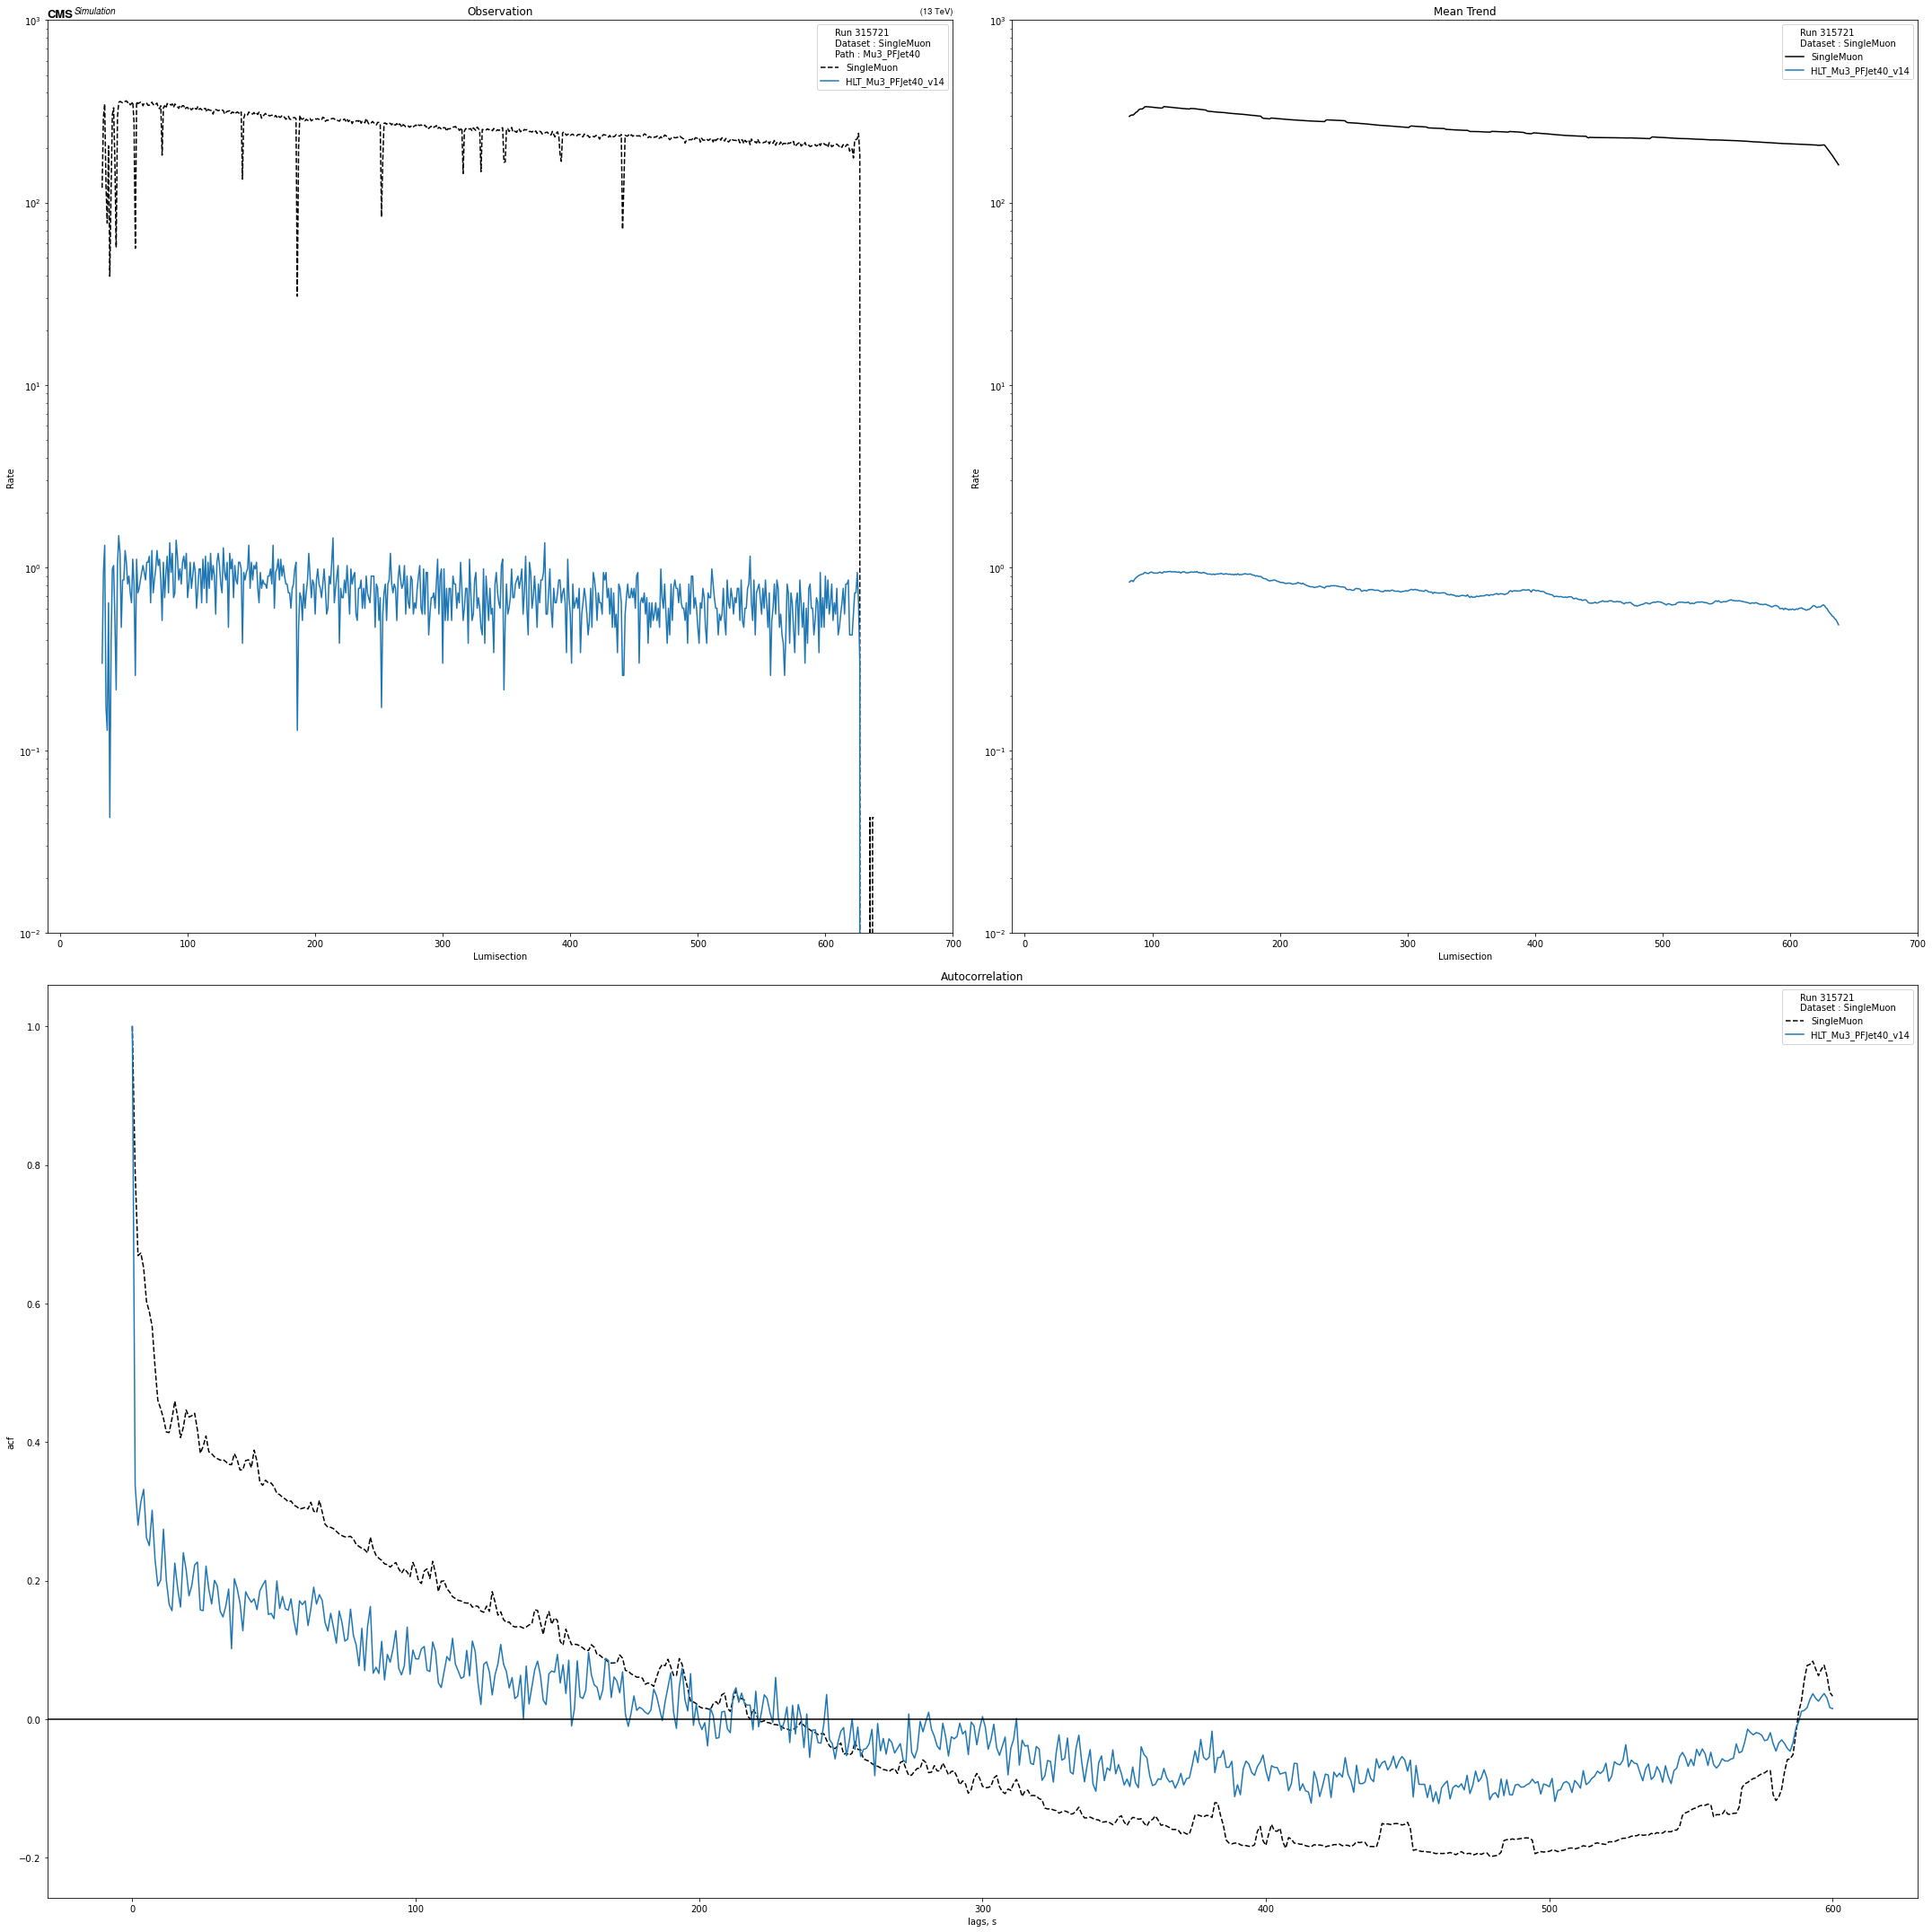

In [17]:
plot([25],path_name='Mu3_PFJet40')